In [22]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
df_lsoa = pd.read_csv('year_lsoa_grocery.csv')
pd.set_option('display.max_columns', None)

In [25]:
df_lsoa.head(10)

,area_id,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,volume_perc2.5,volume_perc25,volume_perc50,volume_perc75,volume_perc97.5,volume_std,volume_ci95,fat,fat_perc2.5,fat_perc25,fat_perc50,fat_perc75,fat_perc97.5,fat_std,fat_ci95,saturate,saturate_perc2.5,saturate_perc25,saturate_perc50,saturate_perc75,saturate_perc97.5,saturate_std,saturate_ci95,salt,salt_perc2.5,salt_perc25,salt_perc50,salt_perc75,salt_perc97.5,salt_std,salt_ci95,sugar,sugar_perc2.5,sugar_perc25,sugar_perc50,sugar_perc75,sugar_perc97.5,sugar_std,sugar_ci95,protein,protein_perc2.5,protein_perc25,protein_perc50,protein_perc75,protein_perc97.5,protein_std,protein_ci95,carb,carb_perc2.5,carb_perc25,carb_perc50,carb_perc75,carb_perc97.5,carb_std,carb_ci95,fibre,fibre_perc2.5,fibre_perc25,fibre_perc50,fibre_perc75,fibre_perc97.5,fibre_std,fibre_ci95,alcohol,alcohol_perc2.5,alcohol_perc25,alcohol_perc50,alcohol_perc75,alcohol_perc97.5,alcohol_std,alcohol_ci95,energy_fat,energy_fat_perc2.5,energy_fat_perc25,energy_fat_perc50,energy_fat_perc75,energy_fat_perc97.5,energy_fat_std,energy_fat_ci95,energy_saturate,energy_saturate_perc2.5,energy_saturate_perc25,energy_saturate_perc50,energy_saturate_perc75,energy_saturate_perc97.5,energy_saturate_std,energy_saturate_ci95,energy_sugar,energy_sugar_perc2.5,energy_sugar_perc25,energy_sugar_perc50,energy_sugar_perc75,energy_sugar_perc97.5,energy_sugar_std,energy_sugar_ci95,energy_protein,energy_protein_perc2.5,energy_protein_perc25,energy_protein_perc50,energy_protein_perc75,energy_protein_perc97.5,energy_protein_std,energy_protein_ci95,energy_carb,energy_carb_perc2.5,energy_carb_perc25,energy_carb_perc50,energy_carb_perc75,energy_carb_perc97.5,energy_carb_std,energy_carb_ci95,energy_fibre,energy_fibre_perc2.5,energy_fibre_perc25,energy_fibre_perc50,energy_fibre_perc75,energy_fibre_perc97.5,energy_fibre_std,energy_fibre_ci95,energy_alcohol,energy_alcohol_perc2.5,energy_alcohol_perc25,energy_alcohol_perc50,energy_alcohol_perc75,energy_alcohol_perc97.5,energy_alcohol_std,energy_alcohol_ci95,energy_tot,energy_tot_perc2.5,energy_tot_perc25,energy_tot_perc50,energy_tot_perc75,energy_tot_perc97.5,energy_tot_std,energy_tot_ci95,f_energy_fat,f_energy_saturate,f_energy_sugar,f_energy_protein,f_energy_carb,f_energy_fibre,f_energy_alcohol,energy_density,h_nutrients_weight,h_nutrients_weight_norm,h_nutrients_calories,h_nutrients_calories_norm,f_beer,f_dairy,f_eggs,f_fats_oils,f_fish,f_fruit_veg,f_grains,f_meat_red,f_poultry,f_readymade,f_sauces,f_soft_drinks,f_spirits,f_sweets,f_tea_coffee,f_water,f_wine,f_dairy_weight,f_eggs_weight,f_fats_oils_weight,f_fish_weight,f_fruit_veg_weight,f_grains_weight,f_meat_red_weight,f_poultry_weight,f_readymade_weight,f_sauces_weight,f_sweets_weight,h_items,h_items_norm,h_items_weight,h_items_weight_norm,representativeness_norm,transaction_days,num_transactions,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
0,E01000001,308.119047,35.0,150.0,250.0,400.0,900.0,266.851723,2.359404,97.218600,15.0000,56.8,75.0,113.6,227.2,67.684593,1.156819,8.535149,0.0,0.2,1.8,12.5,47.0,13.923364,0.098292,3.498749,0.0,0.1,0.5,3.4,21.7,6.802892,0.048025,0.529092,0.0,0.01,0.10,0.70,2.6,3.895324,0.027499,9.213734,0.0,1.1,3.9,9.5,56.8000,15.034263,0.106134,5.262429,0.0,0.7,3.0,7.6,24.0,6.645542,0.046914,15.158014,0.0,0.900,5.1,18.00,71.0000,20.762586,0.146573,1.622653,0.0,0.0,1.0,2.3,8.0000,2.412967,0.017034,0.339168,0.0,0.0,0.0,0.0,7.11,1.741185,0.012292,76.816340,0.0,1.8,16.2,112.5,423.0,125.310279,0.884626,31.488744,0.0,0.9,4.5,30.6,195.3,61.226025,0.432224,36.854937,0.0,4.4,15.6,38.0,227.20,60.137051,0.424536,21.049716,0.0,2.8,12.0,30.4,96.0,26.582168,0.187656,60.632055,0.0,3.6,20.4,72.0,284.00,83.050344,0.586292,3.113038,0.0,0.0,2.0,4.4,15.6,4.794338,0.033846,2.374178,0.0,0.0,0.0,0.0,49.77,12.188293,0.086043,163.985327,0.0,41.2,81.30,248.925,559.700,167.469214,1.182246,0.468434,0.192022,0.224745,0.128363,0.369741,0

# Task 1: Describe the Dataset

This dataset includes 4,833 records and 202 variables and we have 199 columns of float64 datatype, 2 columns of int64 datatype, and 1 column is categorical or object datatype which is area_id, and luckily in this dataset, we have no missing values. and provides a complete picture of nutritional data, energy content from various food sources, and demographic specifics across different areas (as indicated by area_id). The nutritional information is detailed, including weight, volume, and the macronutrient profile. Each nutritional element is then broken down into statistical measurements (percentiles, standard deviations, and confidence intervals), which provide a more comprehensive picture of consumption patterns. The collection additionally measures the energy contribution of different nutrients and contains categorical consumption statistics for a variety of foods. Demographic information complements nutritional and consumption data by providing insights into each area's population characteristics, such as gender distribution, age groups, average age, and population density.
### Data Value
The dataset's relevance stems from its ability to expose complex patterns of nutrient intake and eating habits across various demographics and geographic areas. Researchers can identify correlations between eating habits and demographic characteristics by combining thorough nutritional information with demographic data, which could enhance public health policy, nutritional planning, and targeted interventions. This data can help organizations in the food industry with product development, marketing initiatives, and location-based strategies. Academics and policymakers can use the dataset to investigate public health trends, the efficacy of dietary guidelines, and the influence of socioeconomic factors on nutrition
### Limitations, Assumptions, or Biase
*  Representativeness: Because the dataset only contains transactions made with a loyalty card, the data may be biased toward a demographic that frequents Tesco and participates in its loyalty program.
*  
Geographic and demographic biases: The distribution of Tesco stores, and therefore data, may not consistently cover all locations, potentially biasing the dataset towards regions with higher store concentrations
*  
Scope of Data: The dataset excludes internet purchases and purchases done without a loyalty card, which may limit the dataset's coverage of total food consumption trend
e


In [26]:
ros, cols = df_lsoa.shape
print("Number of Records : ", ros)
print("Number of Attributes : ", cols)

Number of Records :  4833
Number of Attributes :  202


In [27]:
# Task 2: Visualzation of DataSet

In [28]:
column_lists = df_lsoa.columns.tolist()
i = 0
for col in column_lists:
    i+=1
    print(f"Column # {i} Name : {col}")

Column # 1 Name : area_id
Column # 2 Name : weight
Column # 3 Name : weight_perc2.5
Column # 4 Name : weight_perc25
Column # 5 Name : weight_perc50
Column # 6 Name : weight_perc75
Column # 7 Name : weight_perc97.5
Column # 8 Name : weight_std
Column # 9 Name : weight_ci95
Column # 10 Name : volume
Column # 11 Name : volume_perc2.5
Column # 12 Name : volume_perc25
Column # 13 Name : volume_perc50
Column # 14 Name : volume_perc75
Column # 15 Name : volume_perc97.5
Column # 16 Name : volume_std
Column # 17 Name : volume_ci95
Column # 18 Name : fat
Column # 19 Name : fat_perc2.5
Column # 20 Name : fat_perc25
Column # 21 Name : fat_perc50
Column # 22 Name : fat_perc75
Column # 23 Name : fat_perc97.5
Column # 24 Name : fat_std
Column # 25 Name : fat_ci95
Column # 26 Name : saturate
Column # 27 Name : saturate_perc2.5
Column # 28 Name : saturate_perc25
Column # 29 Name : saturate_perc50
Column # 30 Name : saturate_perc75
Column # 31 Name : saturate_perc97.5
Column # 32 Name : saturate_std
Col

In [29]:
df_lsoa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4833 entries, 0 to 4832
Columns: 202 entries, area_id to people_per_sq_km
dtypes: float64(199), int64(2), object(1)
memory usage: 7.4+ MB


## 1. Dataset Explanation

I wanted to know the shape of the dataset for further processing, so in this dataset I have 4833 number of observation and 202 columns/features

In [30]:
ros, cols = df_lsoa.shape
print("Number of Records : ", ros)
print("Number of Attributes : ", cols)

Number of Records :  4833
Number of Attributes :  202


List the number of columns/feature which I have for this dataset.

In [31]:
column_lists = df_lsoa.columns.tolist()
i = 0
for col in column_lists:
    i+=1
    print(f"Column # {i} Name : {col}")

Column # 1 Name : area_id
Column # 2 Name : weight
Column # 3 Name : weight_perc2.5
Column # 4 Name : weight_perc25
Column # 5 Name : weight_perc50
Column # 6 Name : weight_perc75
Column # 7 Name : weight_perc97.5
Column # 8 Name : weight_std
Column # 9 Name : weight_ci95
Column # 10 Name : volume
Column # 11 Name : volume_perc2.5
Column # 12 Name : volume_perc25
Column # 13 Name : volume_perc50
Column # 14 Name : volume_perc75
Column # 15 Name : volume_perc97.5
Column # 16 Name : volume_std
Column # 17 Name : volume_ci95
Column # 18 Name : fat
Column # 19 Name : fat_perc2.5
Column # 20 Name : fat_perc25
Column # 21 Name : fat_perc50
Column # 22 Name : fat_perc75
Column # 23 Name : fat_perc97.5
Column # 24 Name : fat_std
Column # 25 Name : fat_ci95
Column # 26 Name : saturate
Column # 27 Name : saturate_perc2.5
Column # 28 Name : saturate_perc25
Column # 29 Name : saturate_perc50
Column # 30 Name : saturate_perc75
Column # 31 Name : saturate_perc97.5
Column # 32 Name : saturate_std
Col

Here I wanted to know the datatype for each column so, that will be easy for us for further preprocessing here we are not getting to much usefull
information about the dataset using the .info() method here we only getting the points in our dataset we have the columns of datatypes (int64, float64 and, object)

In [32]:
df_lsoa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4833 entries, 0 to 4832
Columns: 202 entries, area_id to people_per_sq_km
dtypes: float64(199), int64(2), object(1)
memory usage: 7.4+ MB


In [33]:
print(df_lsoa.dtypes)

area_id              object
weight              float64
weight_perc2.5      float64
weight_perc25       float64
weight_perc50       float64
                     ...   
age_18_64           float64
age_65+             float64
avg_age             float64
area_sq_km          float64
people_per_sq_km    float64
Length: 202, dtype: object


Here we are trying to getting the complete list of the columns with datatypes for each colums, so there is 199 columns have the (float64) datatype, 2 columns have the (int64) and 1 column have the datatype of the (object) which is 'area_id', so in total we have the 202 columns as we know. 

In [34]:
for column_name, dtype in df_lsoa.dtypes.items():
    print(f"{column_name}: {dtype}")


area_id: object
weight: float64
weight_perc2.5: float64
weight_perc25: float64
weight_perc50: float64
weight_perc75: float64
weight_perc97.5: float64
weight_std: float64
weight_ci95: float64
volume: float64
volume_perc2.5: float64
volume_perc25: float64
volume_perc50: float64
volume_perc75: float64
volume_perc97.5: float64
volume_std: float64
volume_ci95: float64
fat: float64
fat_perc2.5: float64
fat_perc25: float64
fat_perc50: float64
fat_perc75: float64
fat_perc97.5: float64
fat_std: float64
fat_ci95: float64
saturate: float64
saturate_perc2.5: float64
saturate_perc25: float64
saturate_perc50: float64
saturate_perc75: float64
saturate_perc97.5: float64
saturate_std: float64
saturate_ci95: float64
salt: float64
salt_perc2.5: float64
salt_perc25: float64
salt_perc50: float64
salt_perc75: float64
salt_perc97.5: float64
salt_std: float64
salt_ci95: float64
sugar: float64
sugar_perc2.5: float64
sugar_perc25: float64
sugar_perc50: float64
sugar_perc75: float64
sugar_perc97.5: float64
sugar

## 2. Dataset Preprocessing

Now, First inspect that is there any missing value in our dataset

In [35]:
df_lsoa.isnull().sum()

area_id             0
weight              0
weight_perc2.5      0
weight_perc25       0
weight_perc50       0
                   ..
age_18_64           0
age_65+             0
avg_age             0
area_sq_km          0
people_per_sq_km    0
Length: 202, dtype: int64

Here you can inspect that there is not missing value in our dataset column by column, but we have 202 features, so it's hard to go through the all features one by one.

In [36]:
missing_values_count = df_lsoa.isnull().sum()
for column_name, missing_count in missing_values_count.items():
    print(f"{column_name}: {missing_count}")


area_id: 0
weight: 0
weight_perc2.5: 0
weight_perc25: 0
weight_perc50: 0
weight_perc75: 0
weight_perc97.5: 0
weight_std: 0
weight_ci95: 0
volume: 0
volume_perc2.5: 0
volume_perc25: 0
volume_perc50: 0
volume_perc75: 0
volume_perc97.5: 0
volume_std: 0
volume_ci95: 0
fat: 0
fat_perc2.5: 0
fat_perc25: 0
fat_perc50: 0
fat_perc75: 0
fat_perc97.5: 0
fat_std: 0
fat_ci95: 0
saturate: 0
saturate_perc2.5: 0
saturate_perc25: 0
saturate_perc50: 0
saturate_perc75: 0
saturate_perc97.5: 0
saturate_std: 0
saturate_ci95: 0
salt: 0
salt_perc2.5: 0
salt_perc25: 0
salt_perc50: 0
salt_perc75: 0
salt_perc97.5: 0
salt_std: 0
salt_ci95: 0
sugar: 0
sugar_perc2.5: 0
sugar_perc25: 0
sugar_perc50: 0
sugar_perc75: 0
sugar_perc97.5: 0
sugar_std: 0
sugar_ci95: 0
protein: 0
protein_perc2.5: 0
protein_perc25: 0
protein_perc50: 0
protein_perc75: 0
protein_perc97.5: 0
protein_std: 0
protein_ci95: 0
carb: 0
carb_perc2.5: 0
carb_perc25: 0
carb_perc50: 0
carb_perc75: 0
carb_perc97.5: 0
carb_std: 0
carb_ci95: 0
fibre: 0
fibr

Here visually we can clearly see that there is no missing value in our dataset, which good thing so we are good to go for further processing

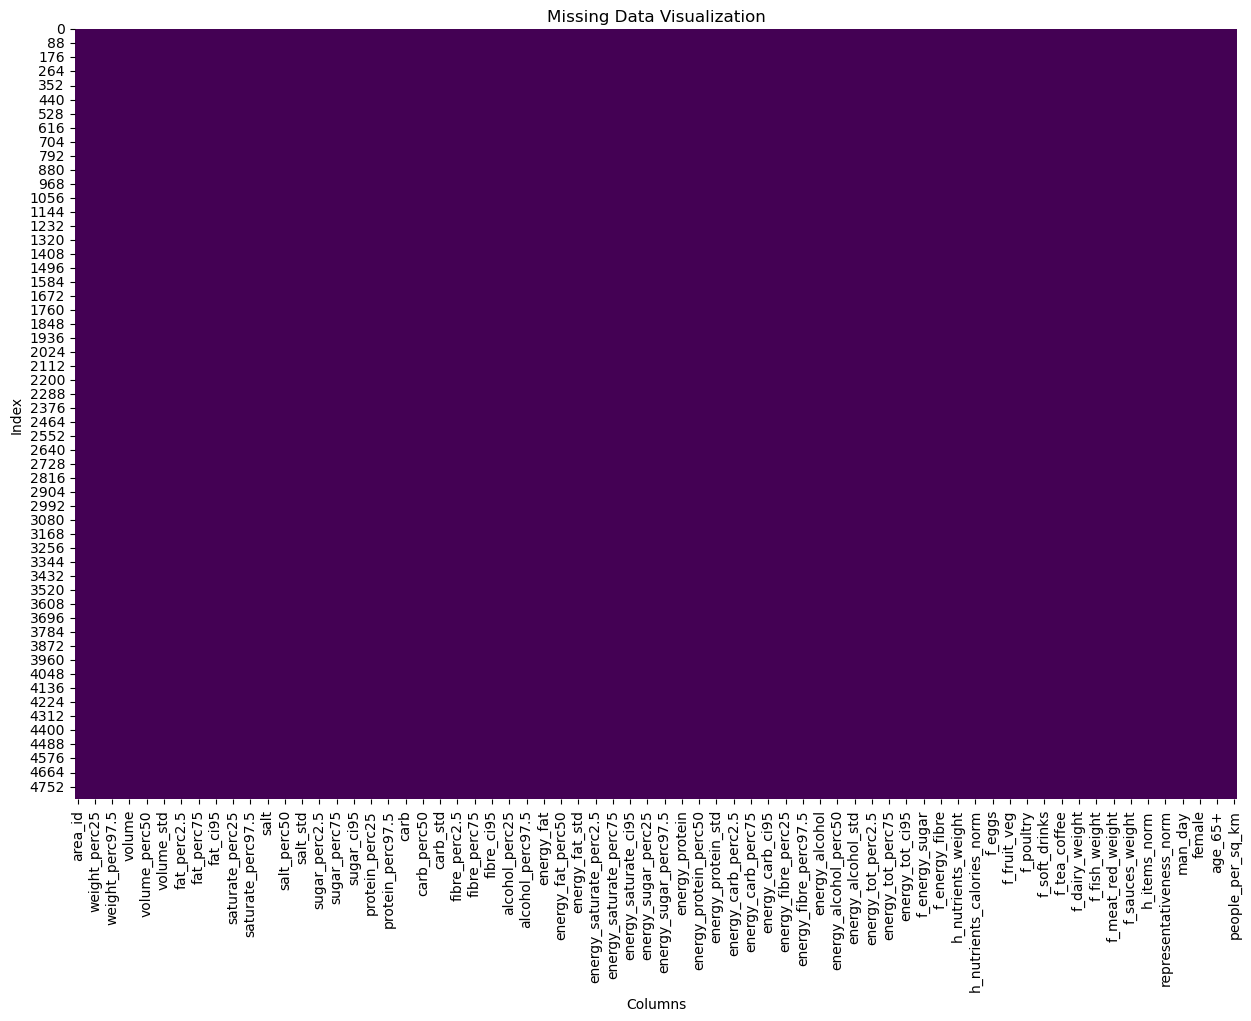

In [37]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_lsoa.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Visualization')
plt.xlabel('Columns')
plt.ylabel('Index')
plt.show()

In [38]:
df_lsoa.describe()

,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,volume_perc2.5,volume_perc25,volume_perc50,volume_perc75,volume_perc97.5,volume_std,volume_ci95,fat,fat_perc2.5,fat_perc25,fat_perc50,fat_perc75,fat_perc97.5,fat_std,fat_ci95,saturate,saturate_perc2.5,saturate_perc25,saturate_perc50,saturate_perc75,saturate_perc97.5,saturate_std,saturate_ci95,salt,salt_perc2.5,salt_perc25,salt_perc50,salt_perc75,salt_perc97.5,salt_std,salt_ci95,sugar,sugar_perc2.5,sugar_perc25,sugar_perc50,sugar_perc75,sugar_perc97.5,sugar_std,sugar_ci95,protein,protein_perc2.5,protein_perc25,protein_perc50,protein_perc75,protein_perc97.5,protein_std,protein_ci95,carb,carb_perc2.5,carb_perc25,carb_perc50,carb_perc75,carb_perc97.5,carb_std,carb_ci95,fibre,fibre_perc2.5,fibre_perc25,fibre_perc50,fibre_perc75,fibre_perc97.5,fibre_std,fibre_ci95,alcohol,alcohol_perc2.5,alcohol_perc25,alcohol_perc50,alcohol_perc75,alcohol_perc97.5,alcohol_std,alcohol_ci95,energy_fat,energy_fat_perc2.5,energy_fat_perc25,energy_fat_perc50,energy_fat_perc75,energy_fat_perc97.5,energy_fat_std,energy_fat_ci95,energy_saturate,energy_saturate_perc2.5,energy_saturate_perc25,energy_saturate_perc50,energy_saturate_perc75,energy_saturate_perc97.5,energy_saturate_std,energy_saturate_ci95,energy_sugar,energy_sugar_perc2.5,energy_sugar_perc25,energy_sugar_perc50,energy_sugar_perc75,energy_sugar_perc97.5,energy_sugar_std,energy_sugar_ci95,energy_protein,energy_protein_perc2.5,energy_protein_perc25,energy_protein_perc50,energy_protein_perc75,energy_protein_perc97.5,energy_protein_std,energy_protein_ci95,energy_carb,energy_carb_perc2.5,energy_carb_perc25,energy_carb_perc50,energy_carb_perc75,energy_carb_perc97.5,energy_carb_std,energy_carb_ci95,energy_fibre,energy_fibre_perc2.5,energy_fibre_perc25,energy_fibre_perc50,energy_fibre_perc75,energy_fibre_perc97.5,energy_fibre_std,energy_fibre_ci95,energy_alcohol,energy_alcohol_perc2.5,energy_alcohol_perc25,energy_alcohol_perc50,energy_alcohol_perc75,energy_alcohol_perc97.5,energy_alcohol_std,energy_alcohol_ci95,energy_tot,energy_tot_perc2.5,energy_tot_perc25,energy_tot_perc50,energy_tot_perc75,energy_tot_perc97.5,energy_tot_std,energy_tot_ci95,f_energy_fat,f_energy_saturate,f_energy_sugar,f_energy_protein,f_energy_carb,f_energy_fibre,f_energy_alcohol,energy_density,h_nutrients_weight,h_nutrients_weight_norm,h_nutrients_calories,h_nutrients_calories_norm,f_beer,f_dairy,f_eggs,f_fats_oils,f_fish,f_fruit_veg,f_grains,f_meat_red,f_poultry,f_readymade,f_sauces,f_soft_drinks,f_spirits,f_sweets,f_tea_coffee,f_water,f_wine,f_dairy_weight,f_eggs_weight,f_fats_oils_weight,f_fish_weight,f_fruit_veg_weight,f_grains_weight,f_meat_red_weight,f_poultry_weight,f_readymade_weight,f_sauces_weight,f_sweets_weight,h_items,h_items_norm,h_items_weight,h_items_weight_norm,representativeness_norm,transaction_days,num_transactions,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
count,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.0,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.0,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.0,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.0,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.0,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.0,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.0,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.0,4833.0,4833.0,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.0,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000

Here From above descriptive statistics of our dataset I have notice that there is some of the variable for percentile25 there is no mean, std_deviation, min and max value and they all are zeros, which might be the case that the 25percentiles of the columns is started from 0,

# Task 2: Visualization of Dataset

In [39]:
bins = [0, 17, 64, float('inf')]  # Adjust according to how you want to bin ages
labels = ['0-17', '18-64', '65+']

# Categorize avg_age into age groups
df_lsoa['age_group'] = pd.cut(df_lsoa['avg_age'], bins=bins, labels=labels, right=True)


I categorize the age_group based on the ave_age, so in our dataset we have the 3 age groups, (0-17, 18-64, and 65+),  

In [40]:
df_lsoa.head()

,area_id,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,volume_perc2.5,volume_perc25,volume_perc50,volume_perc75,volume_perc97.5,volume_std,volume_ci95,fat,fat_perc2.5,fat_perc25,fat_perc50,fat_perc75,fat_perc97.5,fat_std,fat_ci95,saturate,saturate_perc2.5,saturate_perc25,saturate_perc50,saturate_perc75,saturate_perc97.5,saturate_std,saturate_ci95,salt,salt_perc2.5,salt_perc25,salt_perc50,salt_perc75,salt_perc97.5,salt_std,salt_ci95,sugar,sugar_perc2.5,sugar_perc25,sugar_perc50,sugar_perc75,sugar_perc97.5,sugar_std,sugar_ci95,protein,protein_perc2.5,protein_perc25,protein_perc50,protein_perc75,protein_perc97.5,protein_std,protein_ci95,carb,carb_perc2.5,carb_perc25,carb_perc50,carb_perc75,carb_perc97.5,carb_std,carb_ci95,fibre,fibre_perc2.5,fibre_perc25,fibre_perc50,fibre_perc75,fibre_perc97.5,fibre_std,fibre_ci95,alcohol,alcohol_perc2.5,alcohol_perc25,alcohol_perc50,alcohol_perc75,alcohol_perc97.5,alcohol_std,alcohol_ci95,energy_fat,energy_fat_perc2.5,energy_fat_perc25,energy_fat_perc50,energy_fat_perc75,energy_fat_perc97.5,energy_fat_std,energy_fat_ci95,energy_saturate,energy_saturate_perc2.5,energy_saturate_perc25,energy_saturate_perc50,energy_saturate_perc75,energy_saturate_perc97.5,energy_saturate_std,energy_saturate_ci95,energy_sugar,energy_sugar_perc2.5,energy_sugar_perc25,energy_sugar_perc50,energy_sugar_perc75,energy_sugar_perc97.5,energy_sugar_std,energy_sugar_ci95,energy_protein,energy_protein_perc2.5,energy_protein_perc25,energy_protein_perc50,energy_protein_perc75,energy_protein_perc97.5,energy_protein_std,energy_protein_ci95,energy_carb,energy_carb_perc2.5,energy_carb_perc25,energy_carb_perc50,energy_carb_perc75,energy_carb_perc97.5,energy_carb_std,energy_carb_ci95,energy_fibre,energy_fibre_perc2.5,energy_fibre_perc25,energy_fibre_perc50,energy_fibre_perc75,energy_fibre_perc97.5,energy_fibre_std,energy_fibre_ci95,energy_alcohol,energy_alcohol_perc2.5,energy_alcohol_perc25,energy_alcohol_perc50,energy_alcohol_perc75,energy_alcohol_perc97.5,energy_alcohol_std,energy_alcohol_ci95,energy_tot,energy_tot_perc2.5,energy_tot_perc25,energy_tot_perc50,energy_tot_perc75,energy_tot_perc97.5,energy_tot_std,energy_tot_ci95,f_energy_fat,f_energy_saturate,f_energy_sugar,f_energy_protein,f_energy_carb,f_energy_fibre,f_energy_alcohol,energy_density,h_nutrients_weight,h_nutrients_weight_norm,h_nutrients_calories,h_nutrients_calories_norm,f_beer,f_dairy,f_eggs,f_fats_oils,f_fish,f_fruit_veg,f_grains,f_meat_red,f_poultry,f_readymade,f_sauces,f_soft_drinks,f_spirits,f_sweets,f_tea_coffee,f_water,f_wine,f_dairy_weight,f_eggs_weight,f_fats_oils_weight,f_fish_weight,f_fruit_veg_weight,f_grains_weight,f_meat_red_weight,f_poultry_weight,f_readymade_weight,f_sauces_weight,f_sweets_weight,h_items,h_items_norm,h_items_weight,h_items_weight_norm,representativeness_norm,transaction_days,num_transactions,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km,age_group
0,E01000001,308.119047,35.0,150.0,250.0,400.0,900.0,266.851723,2.359404,97.218600,15.0,56.8,75.0,113.6,227.2,67.684593,1.156819,8.535149,0.0,0.2,1.8,12.5,47.0,13.923364,0.098292,3.498749,0.0,0.1,0.5,3.4,21.7,6.802892,0.048025,0.529092,0.0,0.01,0.10,0.70,2.6,3.895324,0.027499,9.213734,0.0,1.1,3.9,9.5,56.8,15.034263,0.106134,5.262429,0.0,0.7,3.0,7.6,24.0,6.645542,0.046914,15.158014,0.0,0.900,5.1,18.0,71.0,20.762586,0.146573,1.622653,0.0,0.0,1.0,2.3,8.0,2.412967,0.017034,0.339168,0.0,0.0,0.0,0.0,7.11,1.741185,0.012292,76.816340,0.0,1.8,16.2,112.5,423.0,125.310279,0.884626,31.488744,0.0,0.9,4.5,30.6,195.3,61.226025,0.432224,36.854937,0.0,4.4,15.6,38.0,227.2,60.137051,0.424536,21.049716,0.0,2.8,12.0,30.4,96.0,26.582168,0.187656,60.632055,0.0,3.6,20.4,72.0,284.0,83.050344,0.586292,3.113038,0.0,0.0,2.0,4.4,15.6,4.794338,0.033846,2.374178,0.0,0.0,0.0,0.0,49.77,12.188293,0.086043,163.985327,0.0,41.2,81.3,248.925,559.7,167.469214,1.182246,0.468434,0.192022,0.224745,0.128363,0.369741,0.018984,

In [41]:
# Calculate average nutrient intake by age group using a list for column selection
average_nutrient_intake = df_lsoa.groupby('age_group')[['fat', 'sugar', 'protein', 'carb', 'fibre','alcohol']].mean()


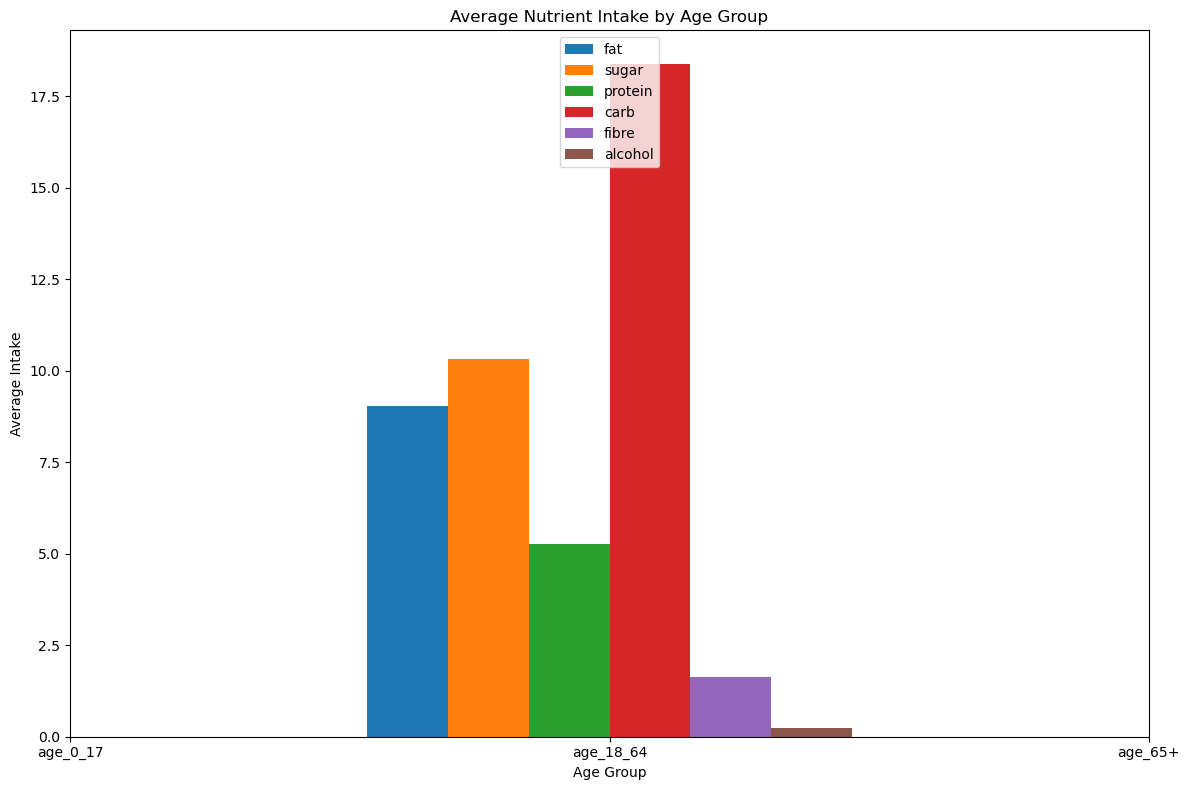

In [42]:
nutrients = ['fat', 'sugar', 'protein', 'carb', 'fibre', 'alcohol']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
age_groups = ['age_0_17', 'age_18_64', 'age_65+']
# Setting the positions for the bars
bar_width = 0.15  # Width of bars
n_bars = len(nutrients)  # Number of nutrients
# The x position of bars
bar_positions = np.arange(len(age_groups))
fig, ax = plt.subplots(figsize=(12, 8))
# Create bars for each nutrient
for i, nutrient in enumerate(nutrients):
    # Calculate the position for each bar
    positions = bar_positions + (i - n_bars / 2) * bar_width + bar_width / 2  
    # Plotting each nutrient bar with its respective color
    ax.bar(positions, average_nutrient_intake[nutrient], width=bar_width, label=nutrient, color=colors[i])
ax.set_xticks(bar_positions)
ax.set_xticklabels(age_groups)
ax.legend()
# Adding labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Average Intake')
ax.set_title('Average Nutrient Intake by Age Group')
plt.tight_layout()
plt.show()

Through visually we can see that the Most average Nutrient Intake by age group is 18-64, and so they people intake alcohol very lesser amount which is good because alcohol is not good for health, and on the other hand we also notice that they are not likely to intake the protein in higher amount,  as compared to fat and sugar which is not good for health, so which means according to these insight the people are more like to intake the fat and sugar.

In [43]:
nutrients = ['fat', 'sugar', 'protein', 'carb', 'fibre', 'alcohol']
demographics = ['population', 'age_0_17', 'age_18_64', 'age_65+', 'avg_age']  
# Creating a new DataFrame with selected columns for the correlation analysis
df_prepared = df_lsoa[nutrients + demographics]

In [44]:
df_prepared.head()

,fat,sugar,protein,carb,fibre,alcohol,population,age_0_17,age_18_64,age_65+,avg_age
0,8.535149,9.213734,5.262429,15.158014,1.622653,0.339168,1296.0,179.0,766.0,351.0,48.293981
1,8.054729,8.337412,5.351774,14.358466,1.692822,0.429261,1156.0,197.0,656.0,303.0,47.398789
2,8.153757,9.414937,5.029519,15.820254,1.522523,0.521810,1350.0,152.0,850.0,348.0,48.360741
3,8.339058,9.603258,5.230254,17.126487,1.612862,0.255560,1121.0,294.0,675.0,152.0,35.611954
4,9.622101,11.355115,5.026295,19.903063,1.640227,0.138525,2040.0,563.0,1317.0,160.0,32.080392


In [45]:
correlation_matrix = df_prepared.corr()

In [46]:
correlation_matrix

,fat,sugar,protein,carb,fibre,alcohol,population,age_0_17,age_18_64,age_65+,avg_age
fat,1.000000,0.543045,0.065477,0.382284,0.059201,-0.175479,-0.001615,0.093441,-0.061896,0.074703,0.038290
sugar,0.543045,1.000000,-0.360883,0.706033,0.032011,-0.282964,-0.038547,0.213189,-0.192235,0.207077,0.093013
protein,0.065477,-0.360883,1.000000,-0.081434,0.258154,0.069506,-0.090561,-0.273007,0.007876,0.006794,0.156712
carb,0.382284,0.706033,-0.081434,1.000000,0.173675,-0.389251,-0.010124,0.294313,-0.175818,0.141835,0.015236
fibre,0.059201,0.032011,0.258154,0.173675,1.000000,-0.128872,-0.115030,-0.198189,-0.124002,0.271290,0.327308
alcohol,-0.175479,-0.282964,0.069506,-0.389251,-0.128872,1.000000,-0.079214,-0.239219,0.014979,-0.023533,0.106084
population,-0.001615,-0.038547,-0.090561,-0.010124,-0.115030,-0.079214,1.000000,0.638701,0.918195,-0.036626,-0.409915
age_0_17,0.093441,0.213189,-0.273007,0.294313,-0.198189,-0.239219,0.638701,1.000000,0.360524,-0.124425,-0.537718
age_18_64,-0.061896,-0.192235,0.007876,-0.175818,-0.124002,0.014979,0.918195,0.360524,1.000000,-0.258501,-0.479527
age_65+,0.074703,0.207077,0.006794,0.141835,0.271290,-0.023533,-0.036626,-0.124425,-0.258501,1.000000,0.838620


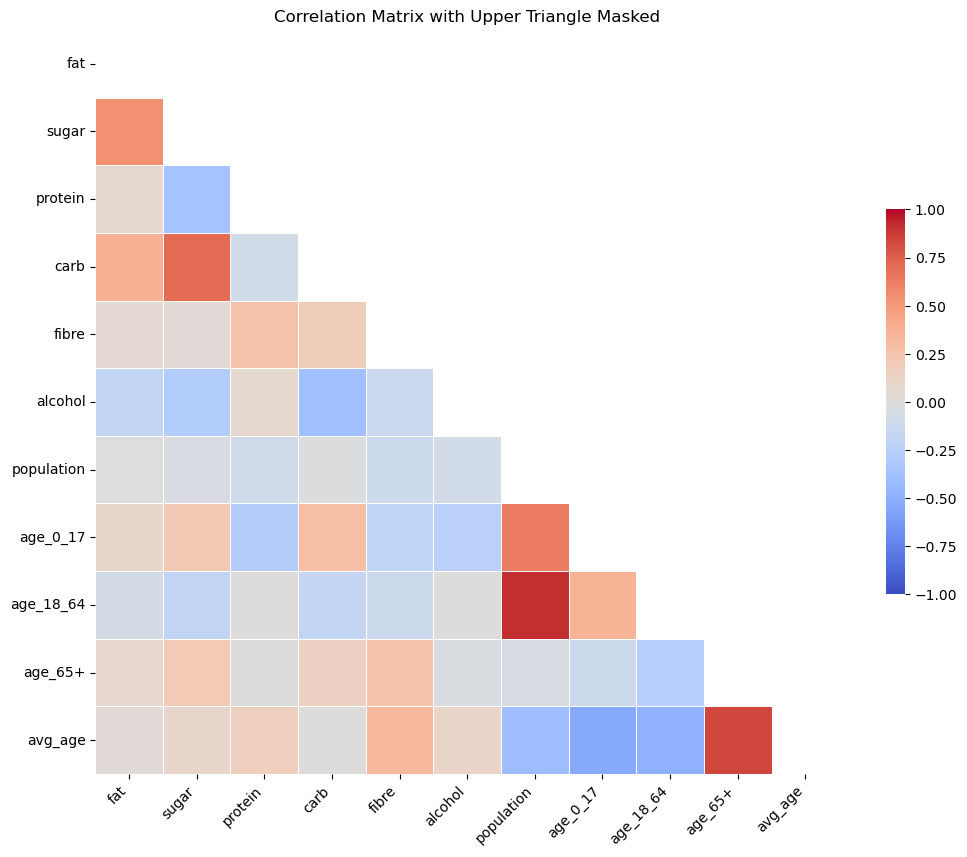

In [47]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title('Correlation Matrix with Upper Triangle Masked')
plt.show()

The visualization gives a simple, straightforward, and visually appealing manner for understanding the relationships between variables in our dataset.
### Positive Correlation:
This means two variables tend to move in the same direction means 1 variable value increases the other variable value also increases and vice versa and the shade of that is most likely close to the red shade here in our dataset the sugar and carb have highly positive correlation with fat, which means if people are more like to intake the sugar and crab they will get more fat.
### Negative Correlation:
This means two variables tend to move in the opposite direction means 1 variable value increases the other variable value also increases and vice versa and the shade of that most likely in close to blue shade.
### Both Positive(close to read shade) and Negative(close to blue shade):
If you see that sort of relation which means the relationship between two variables is not strictly close to linear, which means they could have more complex patterns and linearly they are not separable you can say that.

In [48]:
df_lsoa['age_group'].value_counts()

age_group
18-64    4833
0-17        0
65+         0
Name: count, dtype: int64

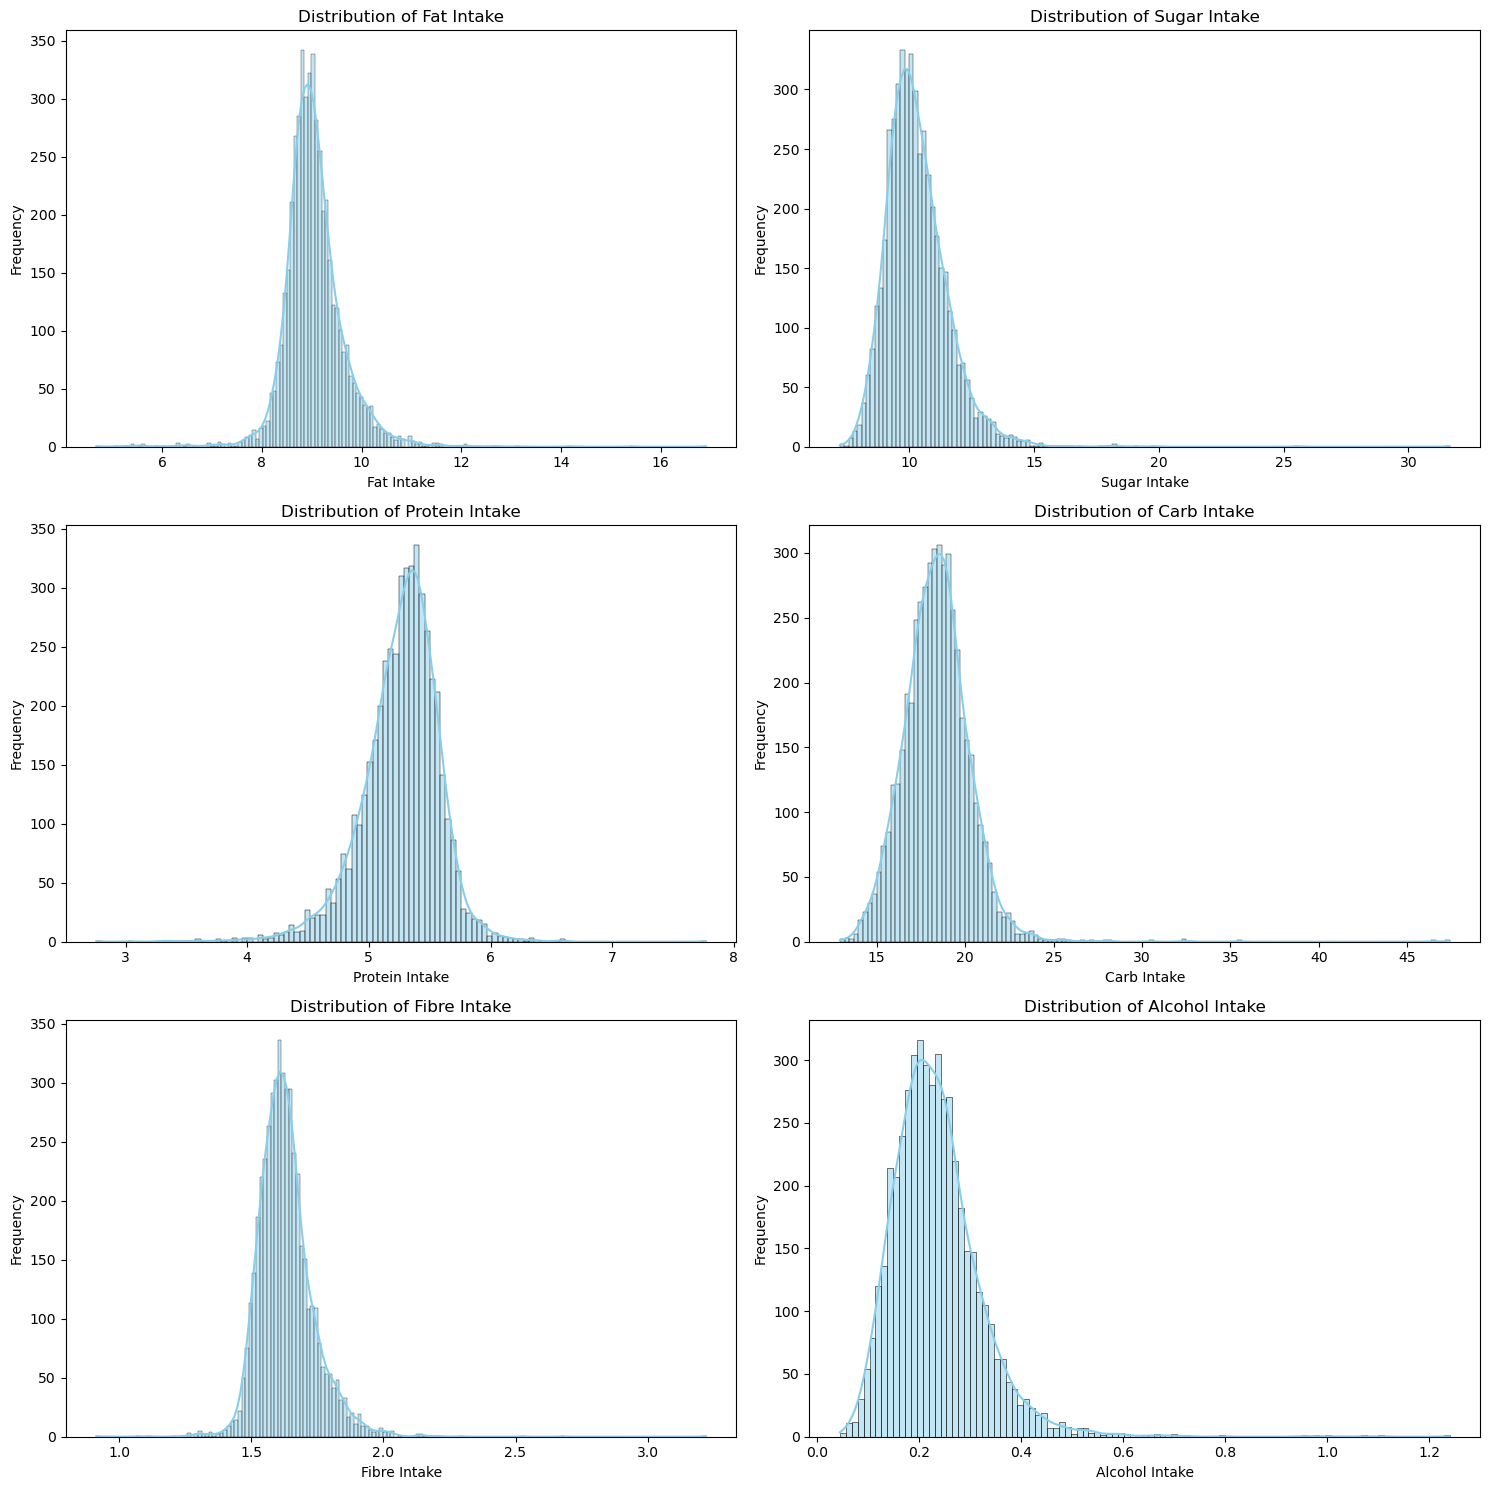

In [49]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.tight_layout(pad=5.0)

# Flattening axes array for easy iteration
axes_flat = axes.flatten()

# Iterating over nutrients and plotting distribution for each
for i, nutrient in enumerate(nutrients):
    # Select the current axis
    ax = axes_flat[i]
    
    # Drop missing values and plot histogram
    sns.histplot(df_lsoa[nutrient].dropna(), kde=True, ax=ax, color='skyblue')
    
    # Setting the title for each subplot
    ax.set_title(f'Distribution of {nutrient.capitalize()} Intake')
    ax.set_xlabel(f'{nutrient.capitalize()} Intake')
    ax.set_ylabel('Frequency')

# Adjusting layout for better readability
plt.tight_layout()

# Show the plots
plt.show()

### Normal Distribution:
A fully normal distribution is symmetric around its mean, which means the majority of the data falls around it this distribution is also called Gaussian Distribution.
Here in our dataset the protein intake and fat intake and the values of these distributions are more tends towards the mean value. 
### Left-Skewed Distribution (Negatively Skewed):
A left-skewed distribution, also known as a negatively skewed distribution, has a longer or fatter tail on the left side than on the right. It implies that the majority of the values (including the median) are clustered to the right of the distribution.The mean is lower than the median, which is lower than the mode.
The majority of the data is focused at the upper end of the scale. Here in above figure there is no distribution is left skewed.
### Right-Skewed Distribution (Positively Skewed):
A right-skewed distribution, also known as a positively skewed distribution, occurs when the right side's tail is longer or fatter than the left side. It implies that the majority of the values are clustered to the left of the distribution.The mean exceeds the median, and both exceed the mode.
The majority of the data is focused toward the bottom end of the spectrum. so there is many nutrients are positively skewed distribution like 'alcohol', 'carb', 'fibre', and 'sugar'.





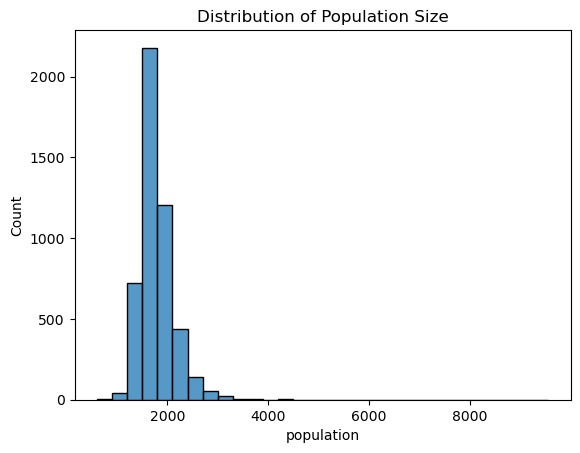

In [50]:
sns.histplot(data=df_lsoa, x='population', bins=30)
plt.title('Distribution of Population Size')
plt.show()


Here, the population distribution is right skewed because this distribution has long tailed to the left side

In [51]:
X = df_lsoa[['population', 'area_sq_km', 'people_per_sq_km']]  # Predictor variables
y = df_lsoa['fat']  # Response variable, 'fat' intake

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"Test RMSE: {rmse}")

Test RMSE: 0.6374123366751582


In [52]:
X = df_lsoa.drop(columns=['area_id', 'age_group', 'fat'])  # Predictor variables
y = df_lsoa['fat']  # Response variable, 'fat' intake
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Test RMSE: {rmse}")

Test RMSE: 0.04278214382109068


So when, I pass the only 3 features, to train my model to predict the 'fat' my Root Mean Square Error" is 0.6374 and when I add the multiple features, just removing the datatype object attribute I got the lower RMSE value which is 0.0427 which means by increasing the features of he model the model improves too much. 

# Task 3: Combining Datasets

In [53]:
df_income = pd.read_excel("localincomedeprivationdata.xlsx", sheet_name = "LSOA")
df_income.head()

,LSOA code (2011),LSOA name (2011),Local Authority District code (2019),Local Authority District name (2019),Overall Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Rank (where 1 is most deprived),Income Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2015 (excluding prisoners),Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners)
0,E01031338,Adur 002A,E07000223,Adur,5.518,30006,10,0.054,25262,8,1159,202,603,354,618
1,E01031339,Adur 002B,E07000223,Adur,6.186,29228,9,0.052,25709,8,1200,229,653,318,664
2,E01031340,Adur 002C,E07000223,Adur,5.213,30309,10,0.027,31386,10,1464,241,691,532,707
3,E01031341,Adur 008A,E07000223,Adur,38.777,4639,2,0.237,4645,2,1371,239,775,357,785
4,E01031342,Adur 008B,E07000223,Adur,16.050,17896,6,0.083,19015,6,1731,235,760,736,768


In [54]:
ros, cols = df_income.shape
print("Number of Records : ", ros)
print("Number of Attributes : ", cols)

Number of Records :  32844
Number of Attributes :  15


In [55]:
df_income.columns

Index(['LSOA code (2011)', 'LSOA name (2011)',
       'Local Authority District code (2019)',
       'Local Authority District name (2019)',
       'Overall Index of Multiple Deprivation (IMD) Score',
       'Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)',
       'Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)',
       'Income Score (rate)', 'Income Rank (where 1 is most deprived)',
       'Income Decile (where 1 is most deprived 10% of LSOAs)',
       'Total population: mid 2015 (excluding prisoners)',
       'Dependent Children aged 0-15: mid 2015 (excluding prisoners)',
       'Population aged 16-59: mid 2015 (excluding prisoners)',
       'Older population aged 60 and over: mid 2015 (excluding prisoners)',
       'Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners) '],
      dtype='object')

In [56]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32844 entries, 0 to 32843
Data columns (total 15 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   LSOA code (2011)                                                                                    32844 non-null  object 
 1   LSOA name (2011)                                                                                    32844 non-null  object 
 2   Local Authority District code (2019)                                                                32844 non-null  object 
 3   Local Authority District name (2019)                                                                32844 non-null  object 
 4   Overall Index of Multiple Deprivation (IMD) Score                                                   32844 non-nu

### Overview of the Income dataset:
This dataset examines socioeconomic and demographic aspects related to income and deprivation within specified geographic areas (LSOAs). The columns include identifiers such as LSOA codes and names, as well as the codes and names of the respective local authority districts. Key indicators include Overall Index of Multiple Deprivation (IMD) scores and rankings, as well as specific income-related measurements that identify places based on deprivation and income disparity.
### Detailed Breakdown of Attributes:
Geographic identifiers include LSOA codes and names, as well as equivalent local authority district codes and names between 2011 and 2019.
Deprivation Scores and Ranks: Comprehensive measures include the Overall IMD Score, IMD Rank, and IMD Decile, which provide a spectrum of deprivation in comparison to comparable places.
Income-specific metrics: Income Score (rate), Income Rank, and Income Decile are focused metrics that analyze the economic state of certain locations.
Demographic Breakdown: Population data is segmented into dependent children (0-15 years), working-age population (16-59/64 years), and older population (60 years and up), as well as overall population estimates, which have been adjusted to remove crimina
### Assumptions and Limitations:
Geographic and temporal coverage: Assumes that the dataset fully captures all relevant geographic areas as of 2019, with no notable changes in boundaries or population movements since mid-2015.
Prisoners are excluded from population numbers, which may have an impact on the accuracy of demographic evaluations in locations with large prison populations.
s.


In [57]:
filtered_df = df_income[df_income["LSOA code (2011)"] == "E01000001"]
filtered_df

,LSOA code (2011),LSOA name (2011),Local Authority District code (2019),Local Authority District name (2019),Overall Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Rank (where 1 is most deprived),Income Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2015 (excluding prisoners),Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners)
6831,E01000001,City of London 001A,E09000001,City of London,6.208,29199,9,0.007,32831,10,1296,175,656,465,715


In [58]:
df_income.describe()

,Overall Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Rank (where 1 is most deprived),Income Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2015 (excluding prisoners),Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners)
count,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000
mean,21.669393,16422.499208,5.500122,0.128166,16422.498478,5.500122,1666.307514,316.802156,965.482737,384.022622,971.587839
std,15.332229,9481.390454,2.872325,0.093539,9481.389874,2.872325,363.622458,117.761896,306.563460,151.874176,304.150940
min,0.541000,1.000000,1.000000,0.003000,1.000000,1.000000,523.000000,17.000000,310.000000,15.000000,329.000000
25%,9.913750,8211.750000,3.000000,0.056000,8211.750000,3.000000,1446.000000,238.000000,784.000000,276.000000,793.000000
50%,17.647500,16422.500000,5.500000,0.099000,16422.500000,5.500000,1598.000000,298.000000,907.000000,367.000000,911.000000
75%,29.583000,24633.250000,8.000000,0.178000,24633.250000,8.000000,1800.000000,372.000000,1074.000000,471.000000,1076.000000
max,92.735000,32844.000000,10.000000,0.609000,32844.000000,10.000000,9551.000000,1632.000000,8608.000000,1372.000000,8589.000000


Here is the descriptive statistics for my income dataset, here we can see that std_dev, mean, min, max and percentiles values for each features.

In [59]:
df_income.isnull().sum()

LSOA code (2011)                                                                                      0
LSOA name (2011)                                                                                      0
Local Authority District code (2019)                                                                  0
Local Authority District name (2019)                                                                  0
Overall Index of Multiple Deprivation (IMD) Score                                                     0
Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)                                   0
Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)                    0
Income Score (rate)                                                                                   0
Income Rank (where 1 is most deprived)                                                                0
Income Decile (where 1 is most deprived 10% of LSOAs)           

So, in our dataset there is no missing value in our dataset

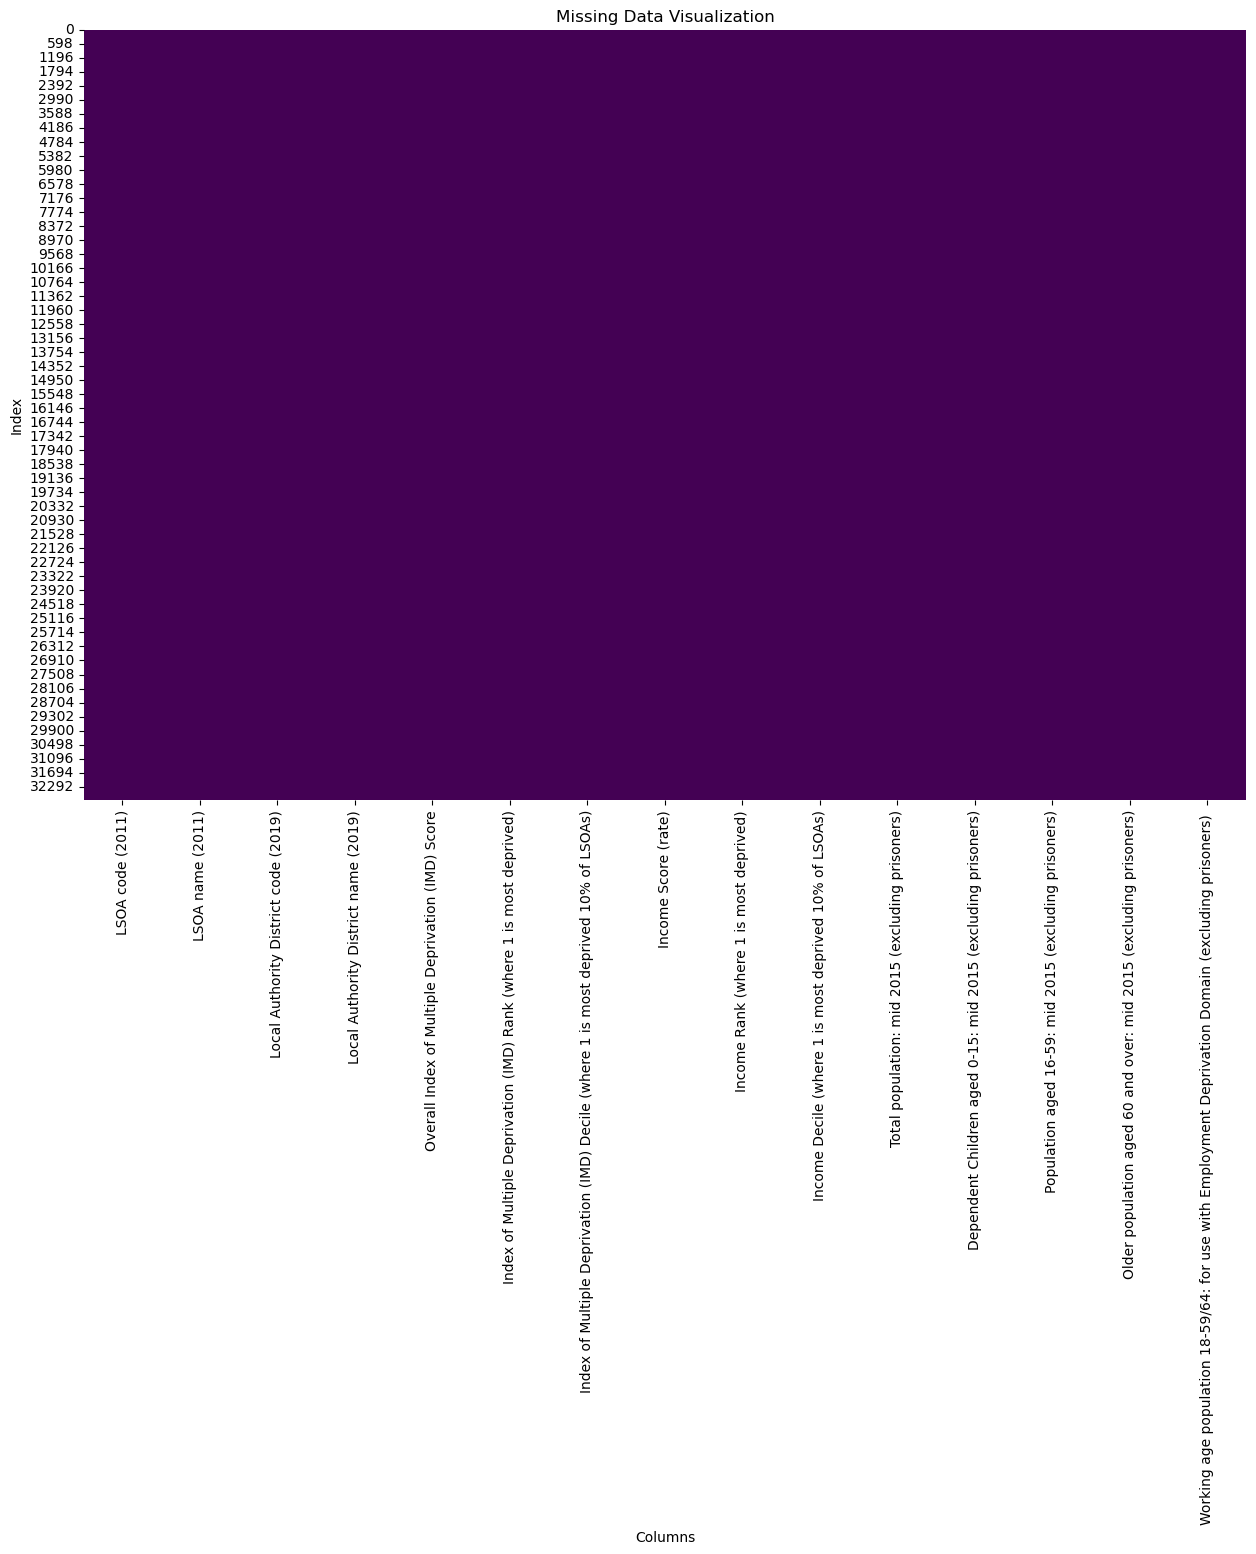

In [60]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_income.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Visualization')
plt.xlabel('Columns')
plt.ylabel('Index')
plt.show()

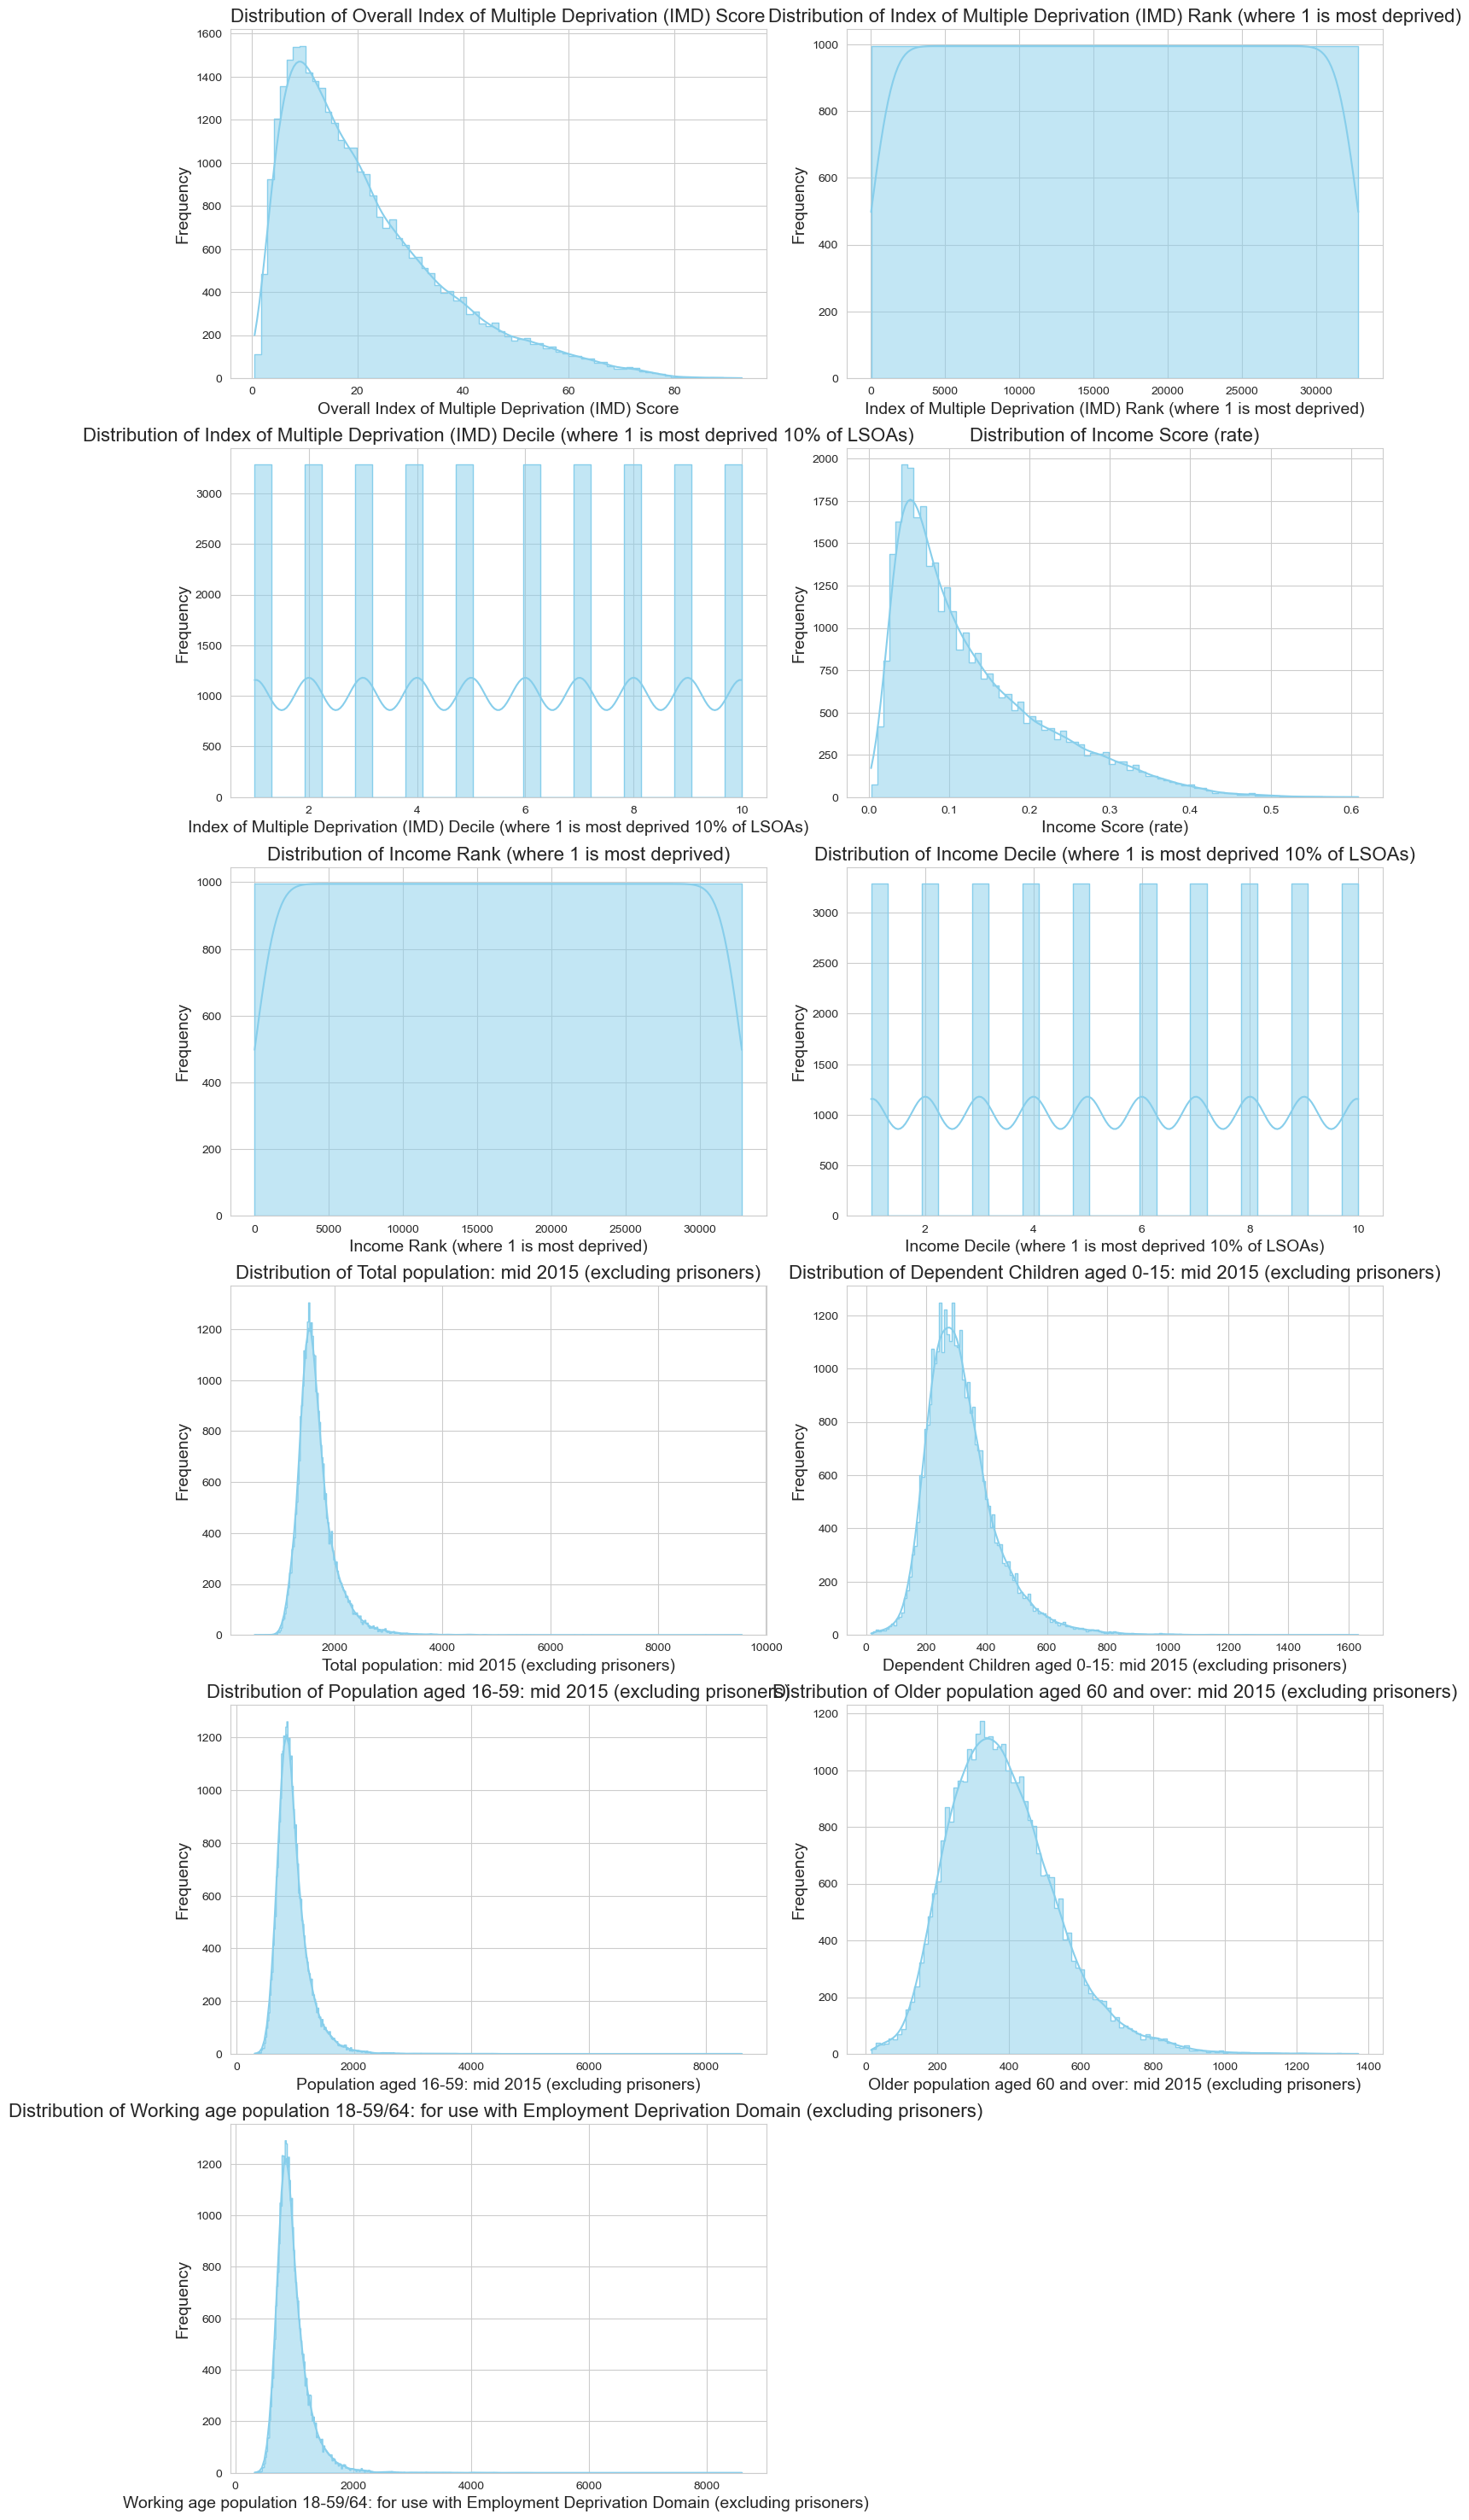

In [61]:
numeric_columns = df_income.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df_income.select_dtypes(exclude=[np.number, 'datetime']).columns.tolist()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize variables for subplot layout
n_cols = 2
n_rows = max(len(numeric_columns), len(categorical_columns)) // n_cols + 1

# Plotting distributions for numeric columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.tight_layout(pad=4.0)

# Flatten the axes array for easy iteration
axes_flat = axes.flatten()

# Function to remove unused subplots
def remove_unused_axes(axes_flat, start_index):
    for i in range(start_index, len(axes_flat)):
        fig.delaxes(axes_flat[i])

# Counter for the current plot
plot_counter = 0

# Plot numeric columns
for col in numeric_columns:
    sns.histplot(df_income[col], kde=True, color='skyblue', element='step', binwidth=None, ax=axes_flat[plot_counter])  # Adjust binwidth as necessary
    axes_flat[plot_counter].set_title(f'Distribution of {col}', fontsize=16)
    axes_flat[plot_counter].set_xlabel(col, fontsize=14)
    axes_flat[plot_counter].set_ylabel('Frequency', fontsize=14)
    plot_counter += 1
    if plot_counter >= len(axes_flat):  # Check if we've used all available subplots
        remove_unused_axes(axes_flat, plot_counter)
        plt.show()
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Start a new figure
        fig.tight_layout(pad=4.0)
        axes_flat = axes.flatten()
        plot_counter = 0  # Reset counter

# Ensure unused subplots are removed and display the last figure for numeric columns
if plot_counter > 0:
    remove_unused_axes(axes_flat, plot_counter)
    plt.show()

Here we can clearly sees that some of the distributions are not seems good because they have the some sort of categorical data like, from (1-10) scale, and some of them have the Right Skewed distrbutions which means, there tails are more tends towards to the right side of the distributions

In [62]:
# Check unique geographical identifiers
unique_areas = df_income['LSOA code (2011)'].nunique()
print(f"Number of unique geographical areas: {unique_areas}")

# Check for demographic group details
demographic_details = ['Total population: mid 2015 (excluding prisoners)', 'Dependent Children aged 0-15: mid 2015 (excluding prisoners)',
                       'Population aged 16-59: mid 2015 (excluding prisoners)', 'Older population aged 60 and over: mid 2015 (excluding prisoners)']
for detail in demographic_details:
    print(f"{detail}: Range {df_income[detail].min()} to {df_income[detail].max()}")


Number of unique geographical areas: 32844
Total population: mid 2015 (excluding prisoners): Range 523 to 9551
Dependent Children aged 0-15: mid 2015 (excluding prisoners): Range 17 to 1632
Population aged 16-59: mid 2015 (excluding prisoners): Range 310 to 8608
Older population aged 60 and over: mid 2015 (excluding prisoners): Range 15 to 1372


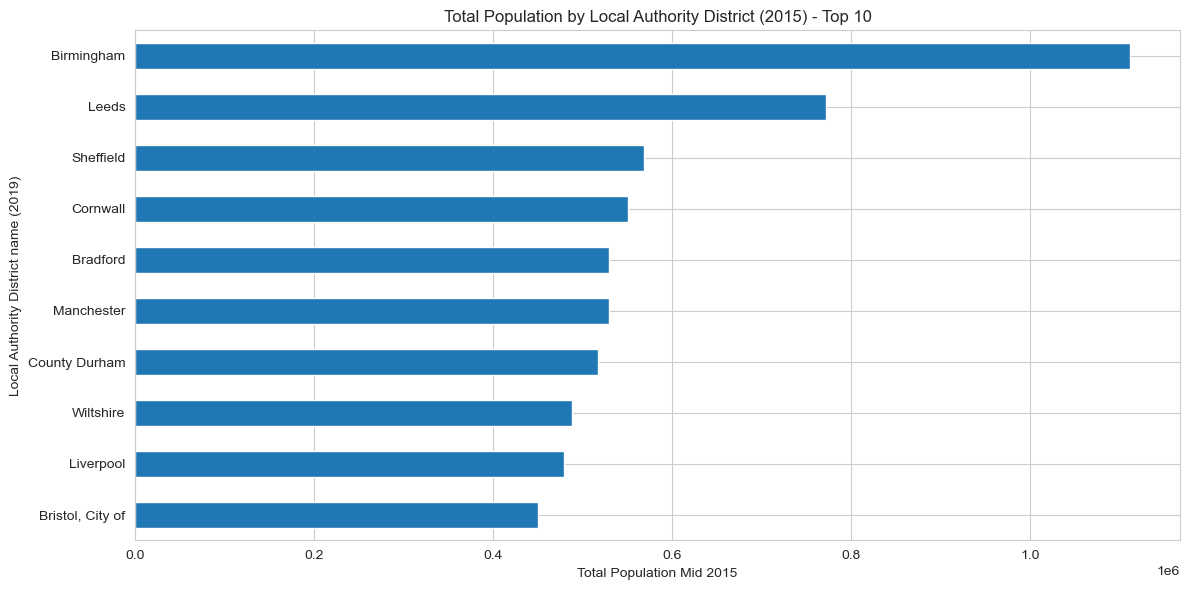

In [63]:
plt.figure(figsize=(12, 6))  # Adjust the size as needed

# Assuming 'df_lsoa' is your DataFrame and focusing on the top 20 Local Authority Districts for demonstration
top_districts = df_income.groupby("Local Authority District name (2019)")["Total population: mid 2015 (excluding prisoners)"].sum().sort_values(ascending=True)

# If the dataset is large, you might consider limiting the output to the top N categories
# Here's an example of limiting the plot to the top 20 districts
top_districts.tail(10).plot.barh()

plt.xlabel("Total Population Mid 2015")
plt.title("Total Population by Local Authority District (2015) - Top 10")
plt.tight_layout()  # Adjust layout to make room for the label
plt.show()

This visualization, notably a horizontal bar chart of the top 10 local authority districts ranked by total population in 2015, allows for a clear and succinct comparison of population sizes between districts, Key demographic data, providing a snapshot of population distribution across districts, can be used to drive future analysis, policymaking, and urban planning activities. It simplifies complex data into an understandable manner, showing substantial disparities in population sizes that may correlate with numerous socioeconomic indices so here in our case Birmingham is on the top.



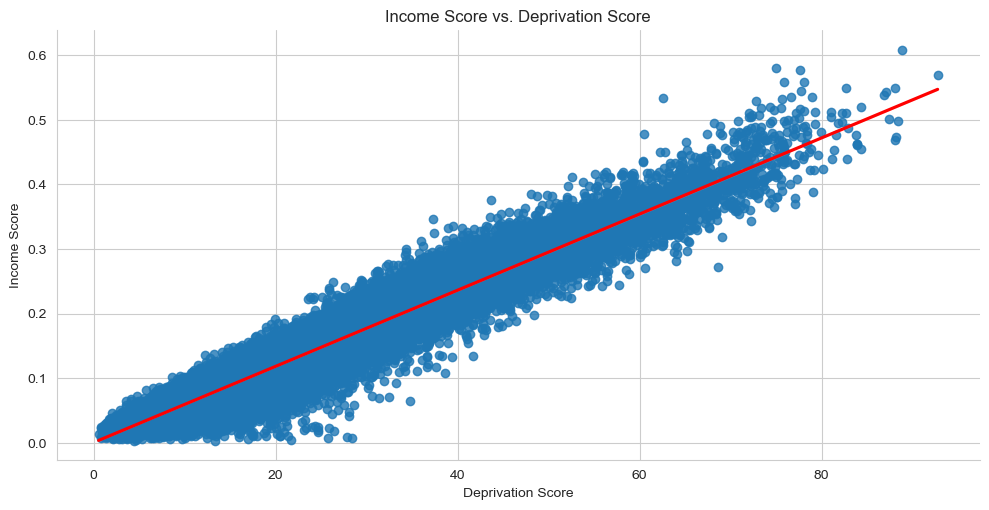

In [64]:
sns.lmplot(x='Overall Index of Multiple Deprivation (IMD) Score', y='Income Score (rate)', data=df_income, aspect=2, line_kws={'color': 'red'})
plt.title('Income Score vs. Deprivation Score')
plt.xlabel('Deprivation Score')
plt.ylabel('Income Score')
plt.show()


### Combine the datasets : 

In [65]:
# Rename the column in df_lsoa from 'area_id' to 'LSOA code (2011)'
df_lsoa.rename(columns={'area_id': 'LSOA code (2011)'}, inplace=True)

# Now merge the datasets
merged_data = pd.merge(df_lsoa, df_income, on='LSOA code (2011)', how='inner')

# Check the merged result
print("Merged Data Shape:", merged_data.shape)
print("Merged Data Columns:", merged_data.columns)


Merged Data Shape: (4833, 217)
Merged Data Columns: Index(['LSOA code (2011)', 'weight', 'weight_perc2.5', 'weight_perc25',
       'weight_perc50', 'weight_perc75', 'weight_perc97.5', 'weight_std',
       'weight_ci95', 'volume',
       ...
       'Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)',
       'Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)',
       'Income Score (rate)', 'Income Rank (where 1 is most deprived)',
       'Income Decile (where 1 is most deprived 10% of LSOAs)',
       'Total population: mid 2015 (excluding prisoners)',
       'Dependent Children aged 0-15: mid 2015 (excluding prisoners)',
       'Population aged 16-59: mid 2015 (excluding prisoners)',
       'Older population aged 60 and over: mid 2015 (excluding prisoners)',
       'Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners) '],
      dtype='object', length=217)


### Reviewed Literature Summary:
* Socioeconomic Impact on Consumer Choices: Recent research has focused on how income differences affect food purchasing habits, specifically the affordability and accessibility of nutritious food in various income categories.
* Economic and Nutritional Analysis: Research from journals such as Food Policy and The Economic Journal sheds light on the relationship between income levels and dietary choices, examining topics such as food deserts and economic limits on healthy eating.
* Cultural and Regional Buying Trends: Research highlights the impact of cultural and regional influences on purchasing patterns, pointing out considerable variances in food preferences and spending habits among demographics.

These studies are critical for understanding the complicated interplay between income and consumer purchasing decisions, since they provide a framework for examining trends in the merged dataset. The literature not only validates the observed trends, but it also aids in finding anomalies where predicted patterns do not appear.


In [66]:
print(merged_data.isnull().sum())

LSOA code (2011)                                                                                      0
weight                                                                                                0
weight_perc2.5                                                                                        0
weight_perc25                                                                                         0
weight_perc50                                                                                         0
                                                                                                     ..
Total population: mid 2015 (excluding prisoners)                                                      0
Dependent Children aged 0-15: mid 2015 (excluding prisoners)                                          0
Population aged 16-59: mid 2015 (excluding prisoners)                                                 0
Older population aged 60 and over: mid 2015 (excluding prisoners

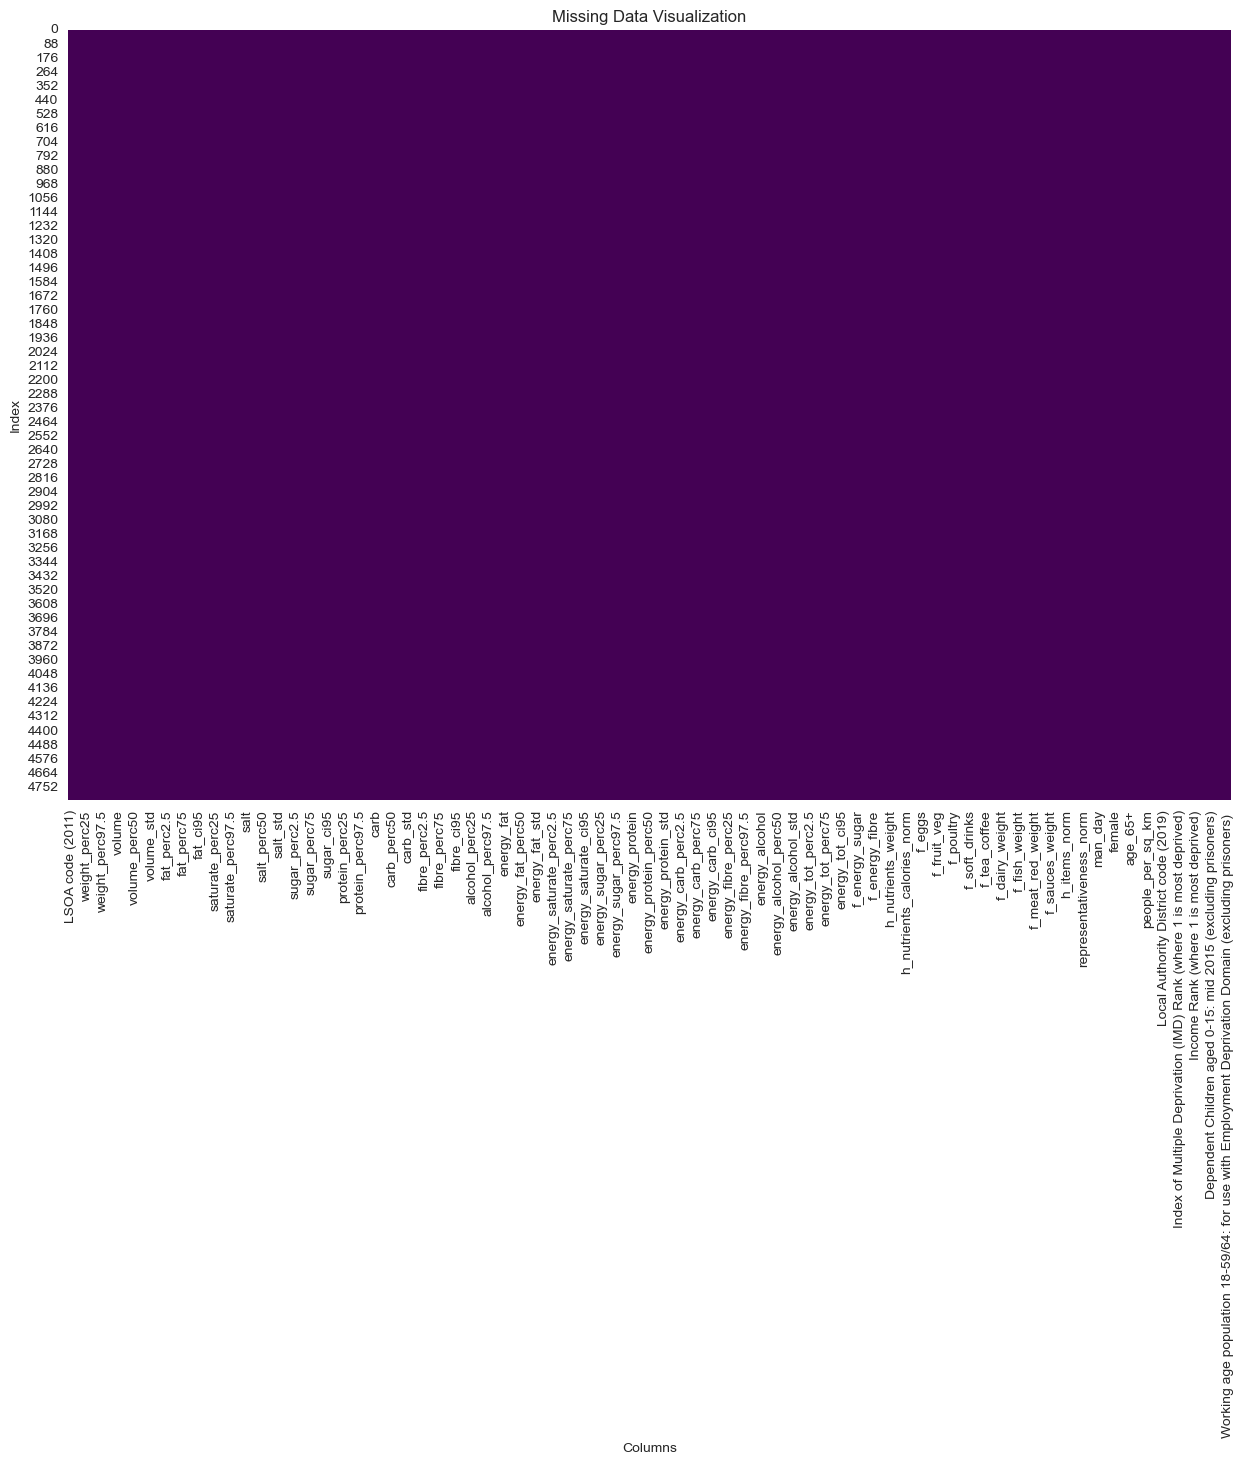

In [67]:
plt.figure(figsize=(15, 10))
sns.heatmap(merged_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Visualization')
plt.xlabel('Columns')
plt.ylabel('Index')
plt.show()

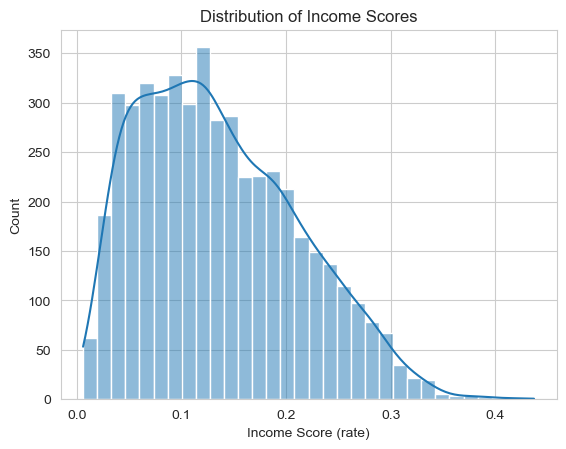

In [68]:
sns.histplot(data=merged_data, x='Income Score (rate)', kde=True)
plt.title('Distribution of Income Scores')
plt.show()

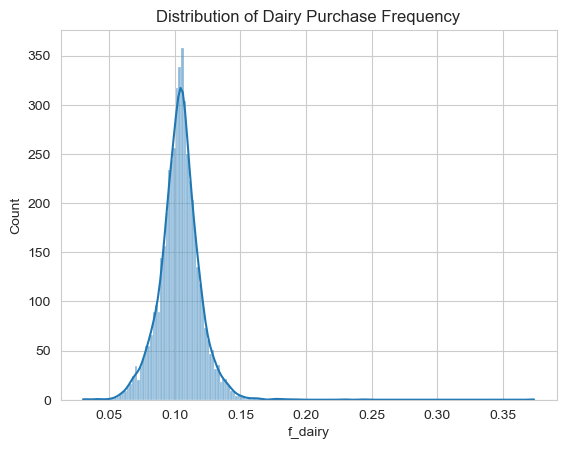

In [69]:
sns.histplot(data=merged_data, x='f_dairy', kde=True)
plt.title('Distribution of Dairy Purchase Frequency')
plt.show()

In [70]:
column_lists = merged_data.columns.tolist()
i = 0
for col in column_lists:
    i+=1
    print(f"Column # {i} Name : {col}")

Column # 1 Name : LSOA code (2011)
Column # 2 Name : weight
Column # 3 Name : weight_perc2.5
Column # 4 Name : weight_perc25
Column # 5 Name : weight_perc50
Column # 6 Name : weight_perc75
Column # 7 Name : weight_perc97.5
Column # 8 Name : weight_std
Column # 9 Name : weight_ci95
Column # 10 Name : volume
Column # 11 Name : volume_perc2.5
Column # 12 Name : volume_perc25
Column # 13 Name : volume_perc50
Column # 14 Name : volume_perc75
Column # 15 Name : volume_perc97.5
Column # 16 Name : volume_std
Column # 17 Name : volume_ci95
Column # 18 Name : fat
Column # 19 Name : fat_perc2.5
Column # 20 Name : fat_perc25
Column # 21 Name : fat_perc50
Column # 22 Name : fat_perc75
Column # 23 Name : fat_perc97.5
Column # 24 Name : fat_std
Column # 25 Name : fat_ci95
Column # 26 Name : saturate
Column # 27 Name : saturate_perc2.5
Column # 28 Name : saturate_perc25
Column # 29 Name : saturate_perc50
Column # 30 Name : saturate_perc75
Column # 31 Name : saturate_perc97.5
Column # 32 Name : saturat

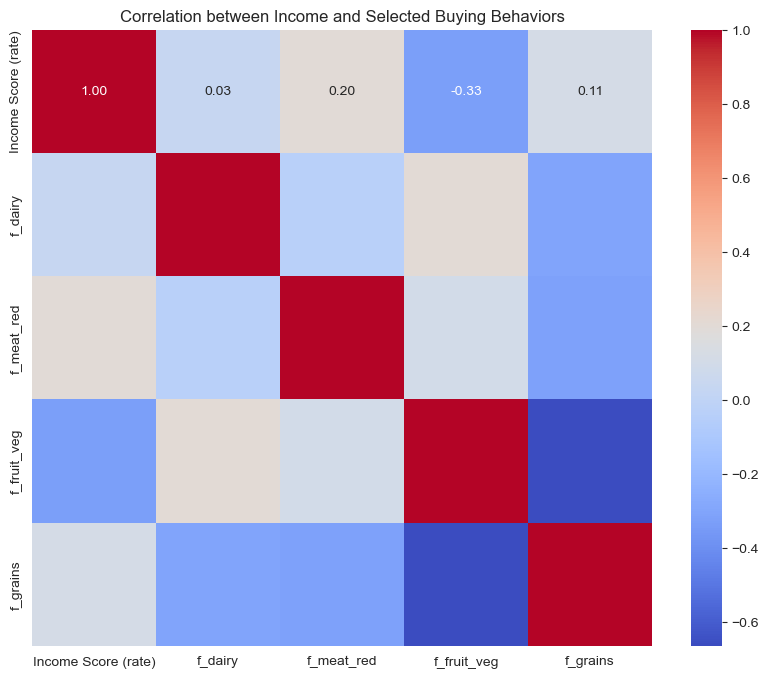

In [71]:

selected_columns = ['Income Score (rate)', 'f_dairy', 'f_meat_red', 'f_fruit_veg', 'f_grains']
correlation_matrix = merged_data[selected_columns].corr()

# Plotting a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Income and Selected Buying Behaviors')
plt.show()


In [72]:
print(correlation_matrix)

                     Income Score (rate)   f_dairy  f_meat_red  f_fruit_veg  \
Income Score (rate)             1.000000  0.032263    0.195663    -0.328682   
f_dairy                         0.032263  1.000000   -0.035505     0.203206   
f_meat_red                      0.195663 -0.035505    1.000000     0.097302   
f_fruit_veg                    -0.328682  0.203206    0.097302     1.000000   
f_grains                        0.111116 -0.303350   -0.318323    -0.663758   

                     f_grains  
Income Score (rate)  0.111116  
f_dairy             -0.303350  
f_meat_red          -0.318323  
f_fruit_veg         -0.663758  
f_grains             1.000000  


### Weak Positive Correlations:
Dairy Purchases (f_dairy): A very modest positive correlation with income suggests that more income has little effect on increasing dairy purchases.
Meat Purchases (f_meat_red): A weak positive association implies that people with greater incomes buy slightly more meat items, presumably because meat is more expensive than other foods.
Grain purchase (f_grains): A minor positive association shows that increased income marginally boosts grain purchases; nevertheless, the relationship is not robust.

### Moderate Negative Correlation:
Fruit and Vegetable Purchases (f_fruit_veg): Because there is a moderate negative connection with income, purchases of fruits and vegetables fall as income rises. This unanticipated tendency may represent differences in nutritional habits, shopping destinations, or lifestyle changes linked with greater income levels.

### Insights and Implications
The relationships could be due to income-driven economic decisions, implying that eating preferences and buying patterns differ among income groups.
Negative associations, particularly with fruits and vegetables, may reflect substitution effects, in which higher-income consumers select alternative sorts of foods or buy at different outlets.


In [73]:
merged_data.head()

,LSOA code (2011),weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,volume_perc2.5,volume_perc25,volume_perc50,volume_perc75,volume_perc97.5,volume_std,volume_ci95,fat,fat_perc2.5,fat_perc25,fat_perc50,fat_perc75,fat_perc97.5,fat_std,fat_ci95,saturate,saturate_perc2.5,saturate_perc25,saturate_perc50,saturate_perc75,saturate_perc97.5,saturate_std,saturate_ci95,salt,salt_perc2.5,salt_perc25,salt_perc50,salt_perc75,salt_perc97.5,salt_std,salt_ci95,sugar,sugar_perc2.5,sugar_perc25,sugar_perc50,sugar_perc75,sugar_perc97.5,sugar_std,sugar_ci95,protein,protein_perc2.5,protein_perc25,protein_perc50,protein_perc75,protein_perc97.5,protein_std,protein_ci95,carb,carb_perc2.5,carb_perc25,carb_perc50,carb_perc75,carb_perc97.5,carb_std,carb_ci95,fibre,fibre_perc2.5,fibre_perc25,fibre_perc50,fibre_perc75,fibre_perc97.5,fibre_std,fibre_ci95,alcohol,alcohol_perc2.5,alcohol_perc25,alcohol_perc50,alcohol_perc75,alcohol_perc97.5,alcohol_std,alcohol_ci95,energy_fat,energy_fat_perc2.5,energy_fat_perc25,energy_fat_perc50,energy_fat_perc75,energy_fat_perc97.5,energy_fat_std,energy_fat_ci95,energy_saturate,energy_saturate_perc2.5,energy_saturate_perc25,energy_saturate_perc50,energy_saturate_perc75,energy_saturate_perc97.5,energy_saturate_std,energy_saturate_ci95,energy_sugar,energy_sugar_perc2.5,energy_sugar_perc25,energy_sugar_perc50,energy_sugar_perc75,energy_sugar_perc97.5,energy_sugar_std,energy_sugar_ci95,energy_protein,energy_protein_perc2.5,energy_protein_perc25,energy_protein_perc50,energy_protein_perc75,energy_protein_perc97.5,energy_protein_std,energy_protein_ci95,energy_carb,energy_carb_perc2.5,energy_carb_perc25,energy_carb_perc50,energy_carb_perc75,energy_carb_perc97.5,energy_carb_std,energy_carb_ci95,energy_fibre,energy_fibre_perc2.5,energy_fibre_perc25,energy_fibre_perc50,energy_fibre_perc75,energy_fibre_perc97.5,energy_fibre_std,energy_fibre_ci95,energy_alcohol,energy_alcohol_perc2.5,energy_alcohol_perc25,energy_alcohol_perc50,energy_alcohol_perc75,energy_alcohol_perc97.5,energy_alcohol_std,energy_alcohol_ci95,energy_tot,energy_tot_perc2.5,energy_tot_perc25,energy_tot_perc50,energy_tot_perc75,energy_tot_perc97.5,energy_tot_std,energy_tot_ci95,f_energy_fat,f_energy_saturate,f_energy_sugar,f_energy_protein,f_energy_carb,f_energy_fibre,f_energy_alcohol,energy_density,h_nutrients_weight,h_nutrients_weight_norm,h_nutrients_calories,h_nutrients_calories_norm,f_beer,f_dairy,f_eggs,f_fats_oils,f_fish,f_fruit_veg,f_grains,f_meat_red,f_poultry,f_readymade,f_sauces,f_soft_drinks,f_spirits,f_sweets,f_tea_coffee,f_water,f_wine,f_dairy_weight,f_eggs_weight,f_fats_oils_weight,f_fish_weight,f_fruit_veg_weight,f_grains_weight,f_meat_red_weight,f_poultry_weight,f_readymade_weight,f_sauces_weight,f_sweets_weight,h_items,h_items_norm,h_items_weight,h_items_weight_norm,representativeness_norm,transaction_days,num_transactions,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km,age_group,LSOA name (2011),Local Authority District code (2019),Local Authority District name (2019),Overall Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Rank (where 1 is most deprived),Income Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2015 (excluding prisoners),Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners)
0,E01000001,308.119047,35.0,150.0,250.0,400.0,900.0,266.851723,2.359404,97.218600,15.0,56.8,75.0,113.6,227.2,67.684593,1.156819,8.535149,0.0,0.2,1.8,12.5,47.0,13.923364,0.098292,3.498749,0.0,0.1,0.5,3.4,21.7,6.802892,0.048025,0.529092,0.0,0.01,0.10,0.70,2

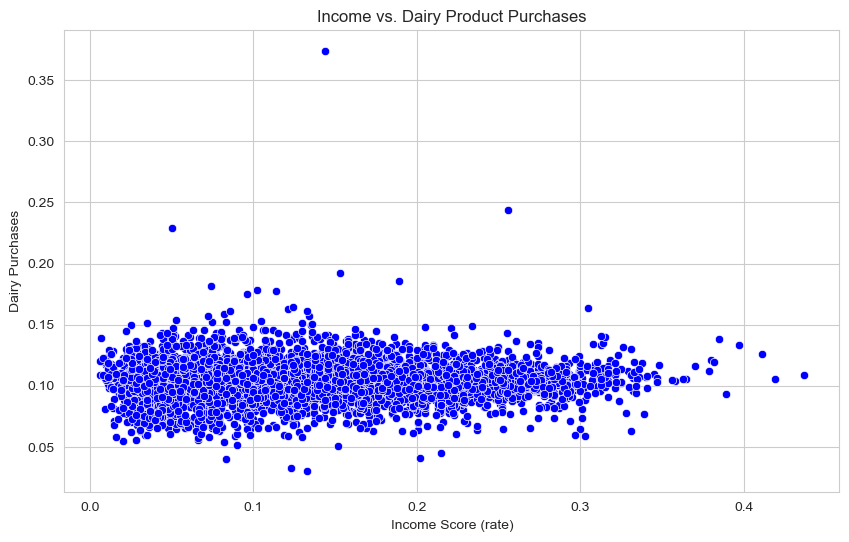

In [74]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Income Score (rate)', y='f_dairy', color='blue')
plt.title('Income vs. Dairy Product Purchases')
plt.xlabel('Income Score (rate)')
plt.ylabel('Dairy Purchases')
plt.grid(True)
plt.show()


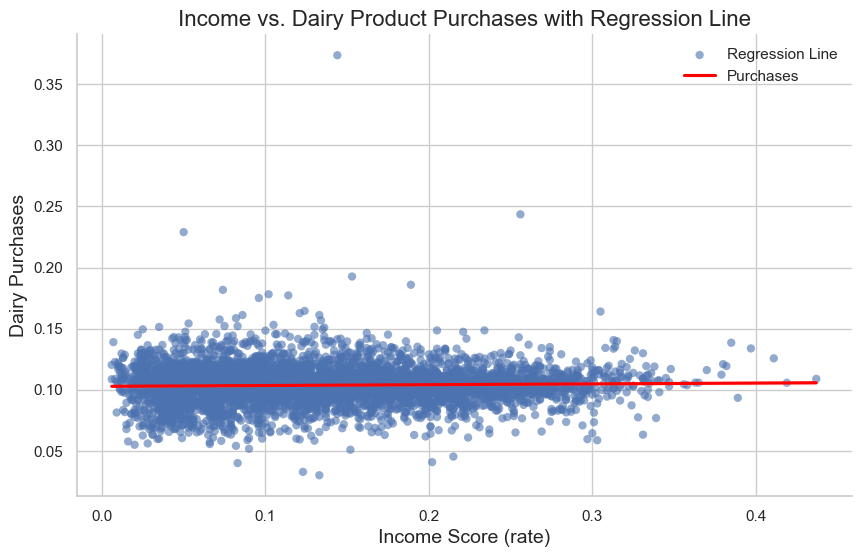

In [75]:
sns.set_theme(style="whitegrid")

# Creating a scatter plot with a regression line
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Income Score (rate)', y='f_dairy', data=merged_data, alpha=0.6, edgecolor='none')
line = sns.regplot(x='Income Score (rate)', y='f_dairy', data=merged_data, scatter=False, color='red')

plt.title('Income vs. Dairy Product Purchases with Regression Line', fontsize=16)
plt.xlabel('Income Score (rate)', fontsize=14)
plt.ylabel('Dairy Purchases', fontsize=14)
plt.legend(labels=['Regression Line', 'Purchases'], frameon=False)
sns.despine() # Removes the top and right spines
plt.show()

In [76]:
predictors = ['f_beer', 'f_dairy', 'f_fats_oils', 'f_fish', 'f_fruit_veg',
              'f_grains', 'f_meat_red', 'f_soft_drinks', 'f_spirits', 'f_sweets',
              'f_tea_coffee', 'f_water', 'f_wine']

X = merged_data[predictors]
y = merged_data['Income Score (rate)']

# Splitting the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating R-squared and residuals
r2 = r2_score(y_test, y_pred)
residuals = y_test - y_pred

# Output the R-squared value
print(f'R-squared value: {r2}')

R-squared value: 0.42609705855058655


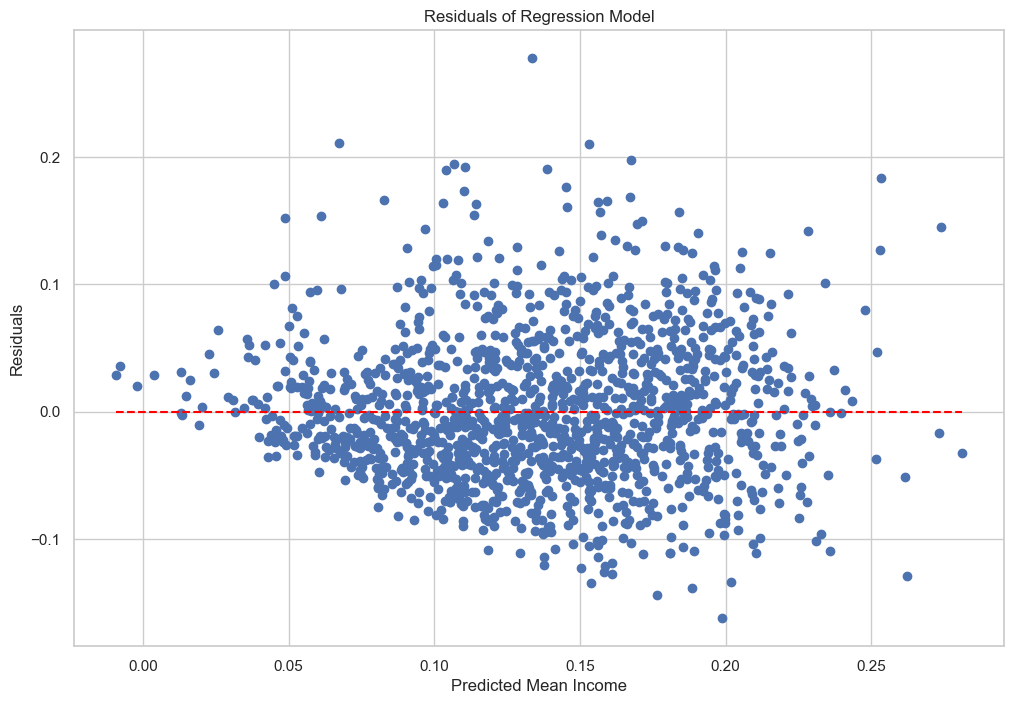

In [89]:
plt.figure(figsize=(12,8))
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Mean Income')
plt.ylabel('Residuals')
plt.title('Residuals of Regression Model')
plt.show()

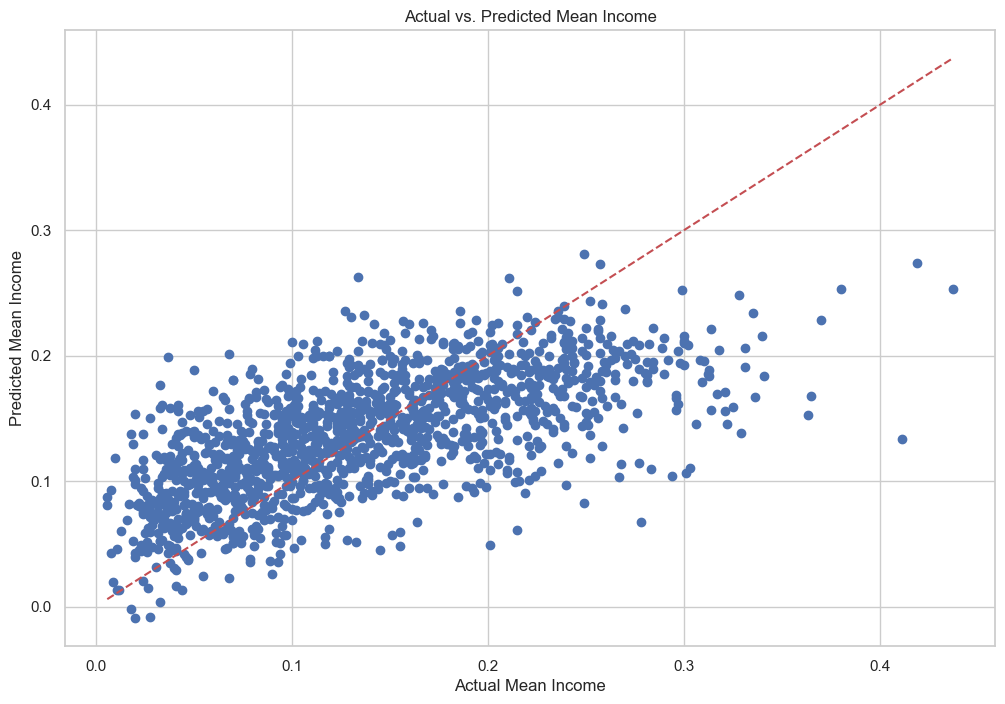

In [88]:
plt.figure(figsize=(12,8))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Mean Income')
plt.ylabel('Predicted Mean Income')
plt.title('Actual vs. Predicted Mean Income')
plt.show()

Our linear regression model predicts mean income well based on food shopping behaviors, with an R-squared value of 0.426. A visual analysis of residual plots reveals that projections are rarely off by more than £10,000, highlighting the utility of food categories as income indicators.


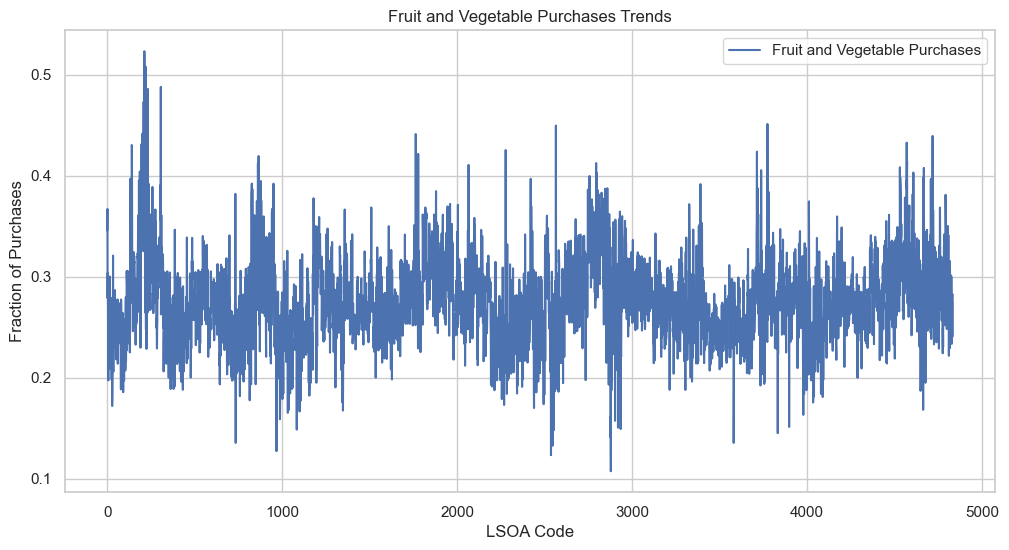

In [91]:
plt.figure(figsize=(12,6))
plt.plot(merged_data['f_fruit_veg'], label='Fruit and Vegetable Purchases')
plt.xlabel('LSOA Code')
plt.ylabel('Fraction of Purchases')
plt.title('Fruit and Vegetable Purchases Trends')
plt.legend()
plt.show()

The Fraction of purchase according to the LSOA code is high in between area of 200-300 and there is the specific code in which we notice that the purchase fraction value is high, which means in this range or in this particular LSAO code are people like to do purchasing and mostly likely it happens they have hihg pay range

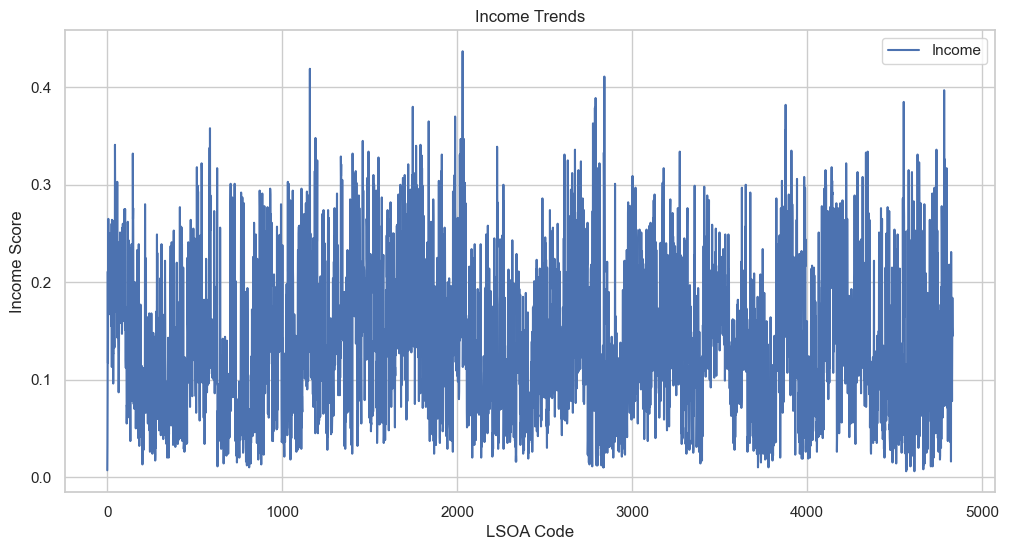

In [92]:
plt.figure(figsize=(12,6))
plt.plot(merged_data['Income Score (rate)'], label='Income')
plt.xlabel('LSOA Code')
plt.ylabel('Income Score')
plt.title('Income Trends')
plt.legend()
plt.show()

After seeing this visual I have notice that the values are most like between mean value fo the incomes, here LSAO code of 2010 have the highest pay or income or on the other hand spesifically people fo these areas they don't like to to purchase items.

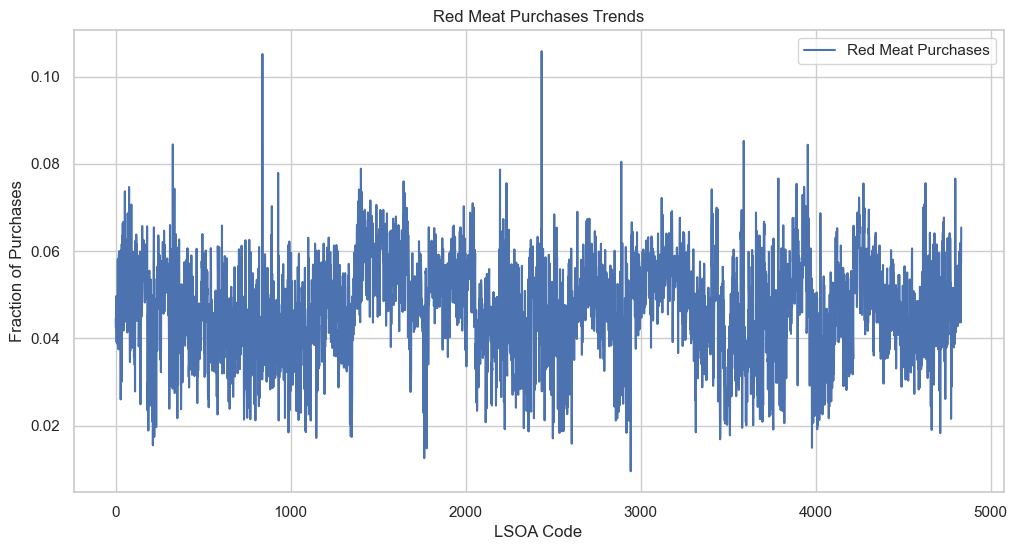

In [93]:
plt.figure(figsize=(12, 6))
plt.plot(merged_data['f_meat_red'], label='Red Meat Purchases')
plt.xlabel('LSOA Code')
plt.ylabel('Fraction of Purchases')
plt.title('Red Meat Purchases Trends')
plt.legend()
plt.show()


Here, is the same trend, as we have seen in veg_fruit purchase.

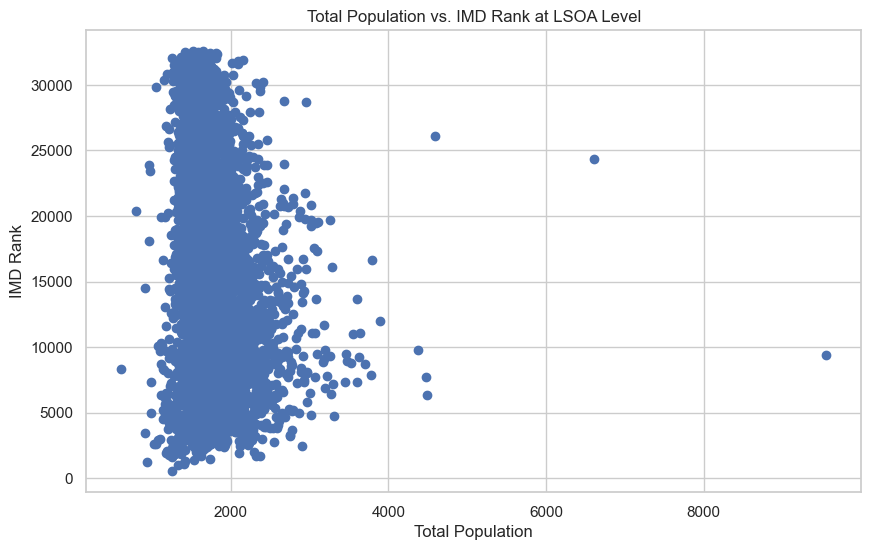

In [84]:
geographic_column = "LSOA code (2011)"

# Filter out non-numeric columns
numeric_columns = merged_data.select_dtypes(include=["int", "float"])

# Aggregate data at the LSOA level
lsoa_level_data = merged_data.groupby(geographic_column)[numeric_columns.columns].sum()

# Analyze trends at the LSOA level
# For example, you can plot the total population vs. the Index of Multiple Deprivation (IMD) Rank
plt.figure(figsize=(10, 6))
plt.scatter(lsoa_level_data["Total population: mid 2015 (excluding prisoners)"], 
            lsoa_level_data["Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)"])
plt.xlabel("Total Population")
plt.ylabel("IMD Rank")
plt.title("Total Population vs. IMD Rank at LSOA Level")
plt.grid(True)
plt.show()


Here above we notice that there is no linear relation found between population and IMD Rank because we notice that the all the values of IMD Rank are scatter between the 1000-2000 total population.

# References: 
* Darmon N, Drewnowski A. Does social class predict diet quality? Am J Clin Nutr. 2008 May;87(5):1107-17. doi: 10.1093/ajcn/87.5.1107. PMID: 18469226.
* Smith, Lisa & Subandoro, Ali. (2007). Measuring Food Security Using Household Expenditure Surveys. International Food Policy Research Institute (IFPRI), Food security in practice technical guide series.
* Asfaw A. Does consumption of processed foods explain disparities in the body weight of individuals? The case of Guatemala. Health Econ. 2011 Feb;20(2):184-95. doi: 10.1002/hec.1579. PMID: 20029821.
* Aiello, L.M., Quercia, D., Schifanella, R. et al. Tesco Grocery 1.0, a large-scale dataset of grocery purchases in London. Sci Data 7, 57 (2020). https://doi.org/10.1038/s41597-020-0397-7
* Office for National Statistics https://www.ons.gov.uk/
* What Is Linear Regression? Types, Equation, Examples, and Best Practices for 2022 https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-linear-regression/
* Sanskar Wagavkar, Introduction to the Correlation Matrix https://builtin.com/data-science/correlation-matrix
* ADAM HAYES, icies 
Descriptive Statistics: Definition, Overview, Types, https://www.investopedia.com/terms/d/descriptive_statistics.asp
* Niklas Donges, Random Forest: A Complete Guide for Machine Learning https://builtin.com/data-science/random-forest-algorithm
* A deeper look at the Tesco dataset using food categories, https://p-ada-wan.github.io/ Example